## Business Case Analysis

No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge.

In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%.

No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.

## Project Goal

1. Understanding the variables that are influencing the customers to migrate.

2. Creating Churn risk scores that can be indicative to drive 
retention campaigns

3. . Introduce new predicting variable “CHURN-FLAG” with valu s
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES custom

Help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, such as customer care support, request fulfillment, auto categorizing tickets as high priority for quicker resolutions of any questions customers may have etc.ers.

## Dataset Description

The given Customer churn dataset consist of 4617 rows. The features present in the data are 21 columns. The shape of the dataset is 4617x21. The 21 features are classified into quantitative and qualitative where 15 features are quantitative and 6 features are qualitative includinf target variable.

## Import Libraries and Load the Dataset

In [4]:
import warnings
warnings.filterwarnings('ignore')

# data import & pre-processing
import numpy as np 
import pandas as pd
from scipy import stats

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


# cross validation
from sklearn.model_selection import cross_val_score

# Model evaluation metrics

from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,log_loss,recall_score,precision_score, confusion_matrix


In [5]:
#pip install mysql-connector-python

In [6]:
import mysql.connector

In [7]:
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user = 'dm_team3', # data-base Username
                                    password ='DM!$!Team!27@9!20&',# data-base Password
                                    database ='project_telecom')  # data-base schema name

In [8]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [9]:
## Check the number of databases available on the server
cursor = connection.cursor()
cursor.execute('show databases')
databases = cursor.fetchall()  # Fetch all results
print(f'Number of databases: {len(databases)}')

Number of databases: 2


In [10]:
pd.set_option('display.max_columns', None)

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
query = "select * from telecom_churn_data" # SQL statement
df = pd.read_sql(query,connection)

## EDA

#### Basic Checks

In [13]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
df.tail()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [15]:
df.shape

(4617, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [17]:
df.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [18]:
#As per client rename the features
df.rename(columns={'columns1':'State',
                   'columns2':'Account_Length',
                   'columns3':'Area_Code',
                   'columns4':'Phone',
                   'columns5':'International_Plan',
                   'columns6':'VMail_Plan',
                   'columns7':'VMail_Message',
                   'columns8':'Day_Mins',
                   'columns9':'Day_Calls',
                   'columns10':'Day_Charge',
                   'columns11':'Eve_Mins',
                   'columns12':'Eve_Calls',
                   'columns13':'Eve_Charge',
                   'columns14':'Night_Mins',
                   'columns15':'Night_Calls',
                   'columns16':'Night_Charge',
                   'columns17':'International_Mins',
                   'columns18':'International_calls',
                   'columns19':'International_Charge',
                   'columns20':'CustServ_Calls',
                   'columns21':'Churn'},
                    inplace=True)
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
df.Account_Length=df.Account_Length.astype('int64')
df.VMail_Message=df.VMail_Message.astype('int64')
df.Day_Mins=df.Day_Mins.astype('float64')
df.Day_Calls=df.Day_Calls.astype('int64')
df.Day_Charge=df.Day_Charge.astype('float64')
df.Eve_Mins=df.Eve_Mins.astype('float64')
df.Eve_Calls=df.Eve_Calls.astype('int64')
df.Eve_Charge=df.Eve_Charge.astype('float64')
df.Night_Mins=df.Night_Mins.astype('float64')
df.Night_Calls=df.Night_Calls.astype('int64')
df.Night_Charge=df.Night_Charge.astype('float64')
df.International_Mins=df.International_Mins.astype('float64')
df.International_calls=df.International_calls.astype('int64')
df.International_Charge=df.International_Charge.astype('float64')
df.CustServ_Calls=df.CustServ_Calls.astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   object 
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [21]:
df.describe()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [22]:
df.describe(include='object')

,State,Area_Code,Phone,International_Plan,VMail_Plan,Churn
count,4617,4617,4617,4617,4617,4617
unique,51,3,4617,2,2,2
top,WV,415,382-4657,no,no,False.
freq,149,2299,1,4171,3381,3961


##### Distribution of target variable


In [23]:
df.Churn.value_counts()

Churn
 False.    3961
 True.      656
Name: count, dtype: int64

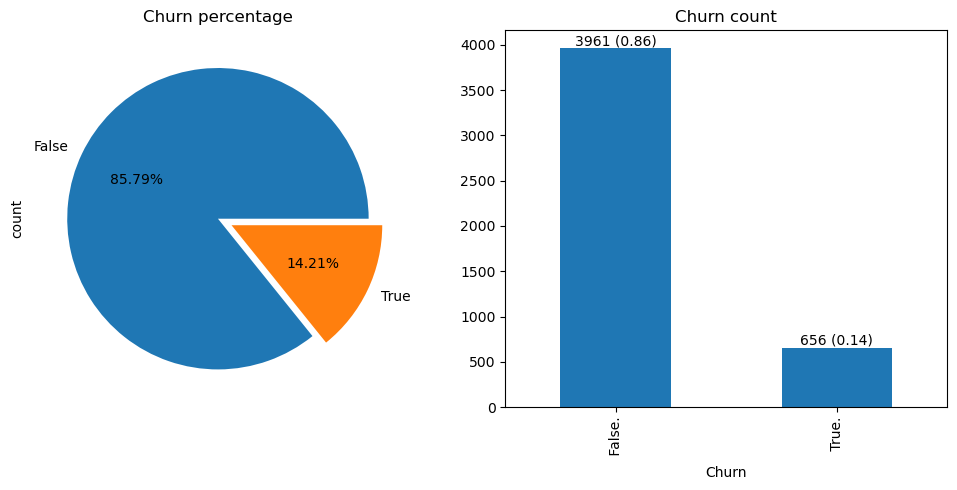

In [24]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5))


df.Churn.value_counts().plot.pie(autopct = "%0.2f%%",explode = [0,0.1], labels=['False','True'],ax=ax[0])

ax[0].set_title('Churn percentage')

value_counts = df.Churn.value_counts()
normalized_counts = df.Churn.value_counts(normalize=True)
bars =value_counts.plot(kind='bar', ax=ax[1])

# Annotate each bar with the value counts
for i, bar in enumerate(bars.patches):
    count = value_counts[i]
    normalized = normalized_counts[i]
    ax[1].annotate(f'{count} ({normalized:.2f})',  # Display both counts
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='bottom', 
                   fontsize=10)
    
ax[1].set_title('Churn count')
# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [25]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [26]:
df_cat=df[['State','Area_Code','International_Plan','CustServ_Calls','VMail_Plan']]

In [27]:
df_num=df[['Account_Length','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_Charge']]

#### Univariant analysis

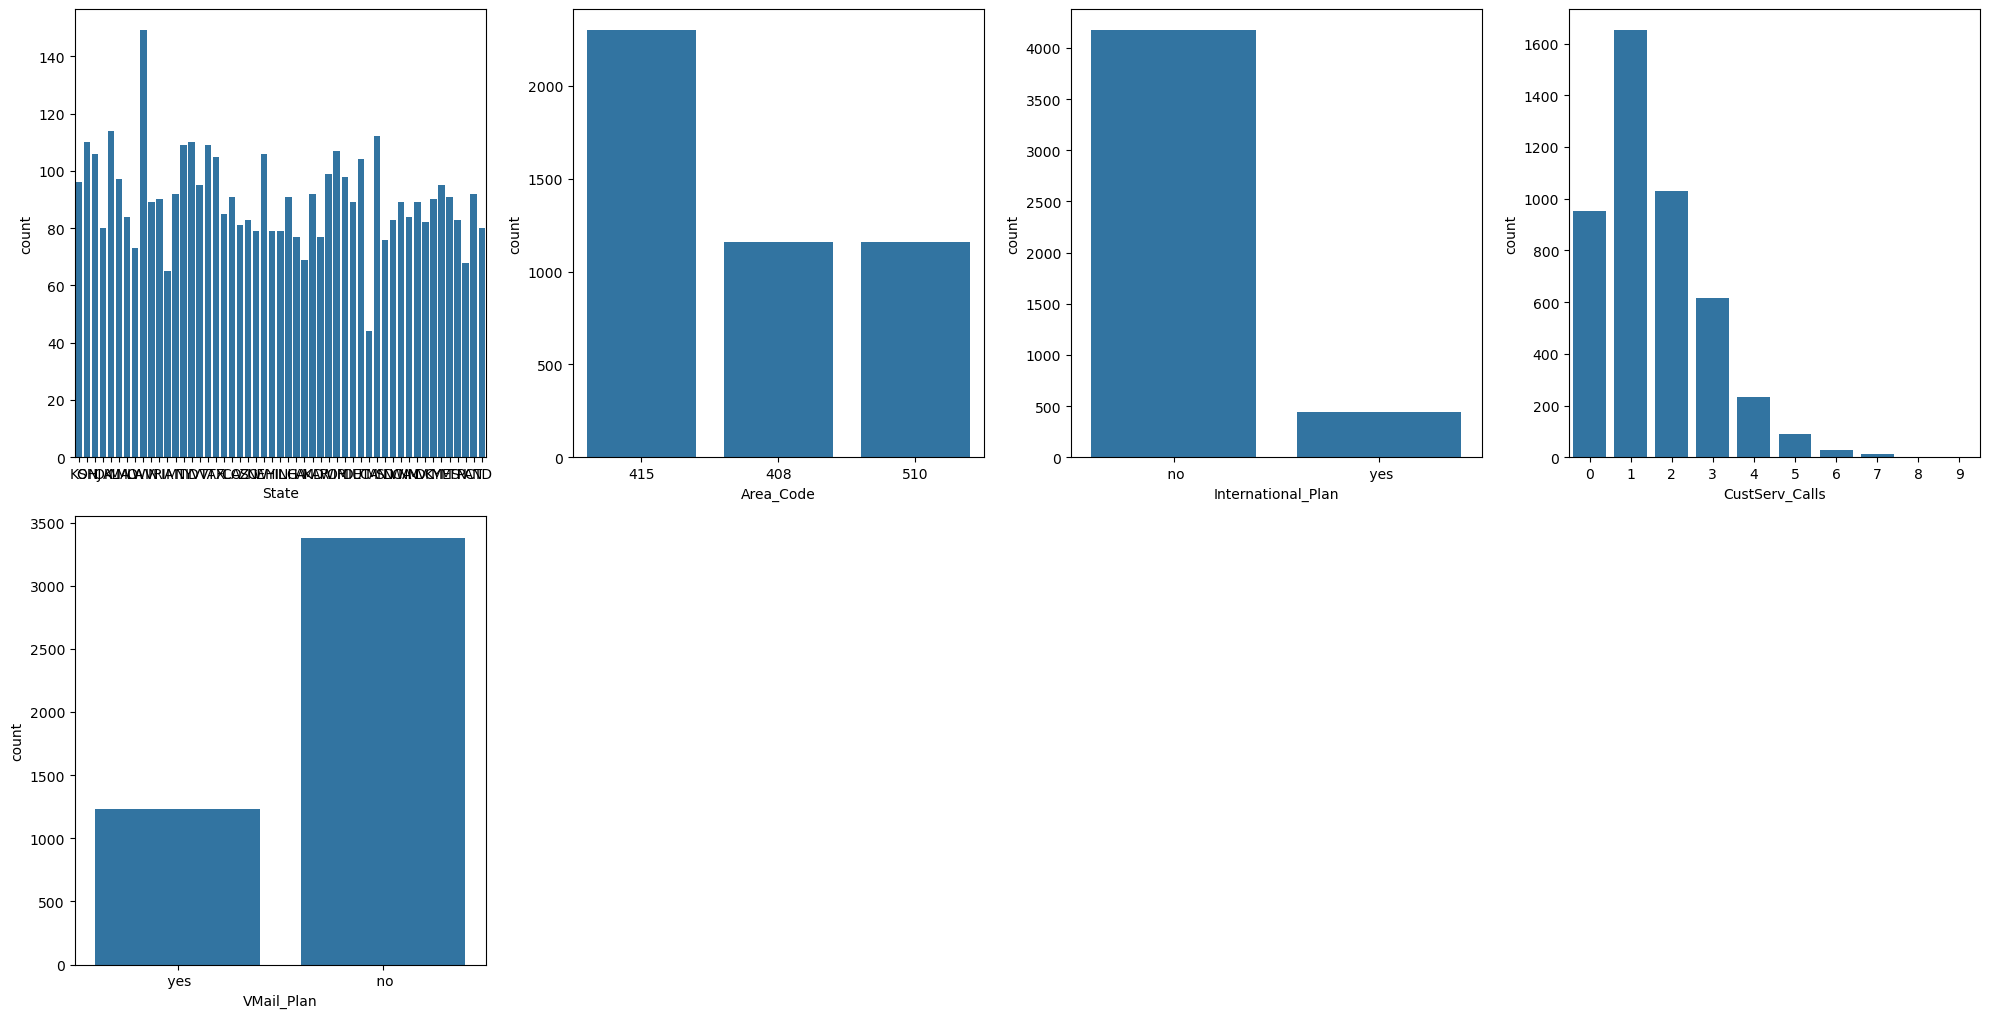

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_cat:
    plt.subplot(4,4,plotnumber)
    sns.countplot(x=df_cat[i])
    plotnumber=plotnumber+1

plt.tight_layout()
plt.show()

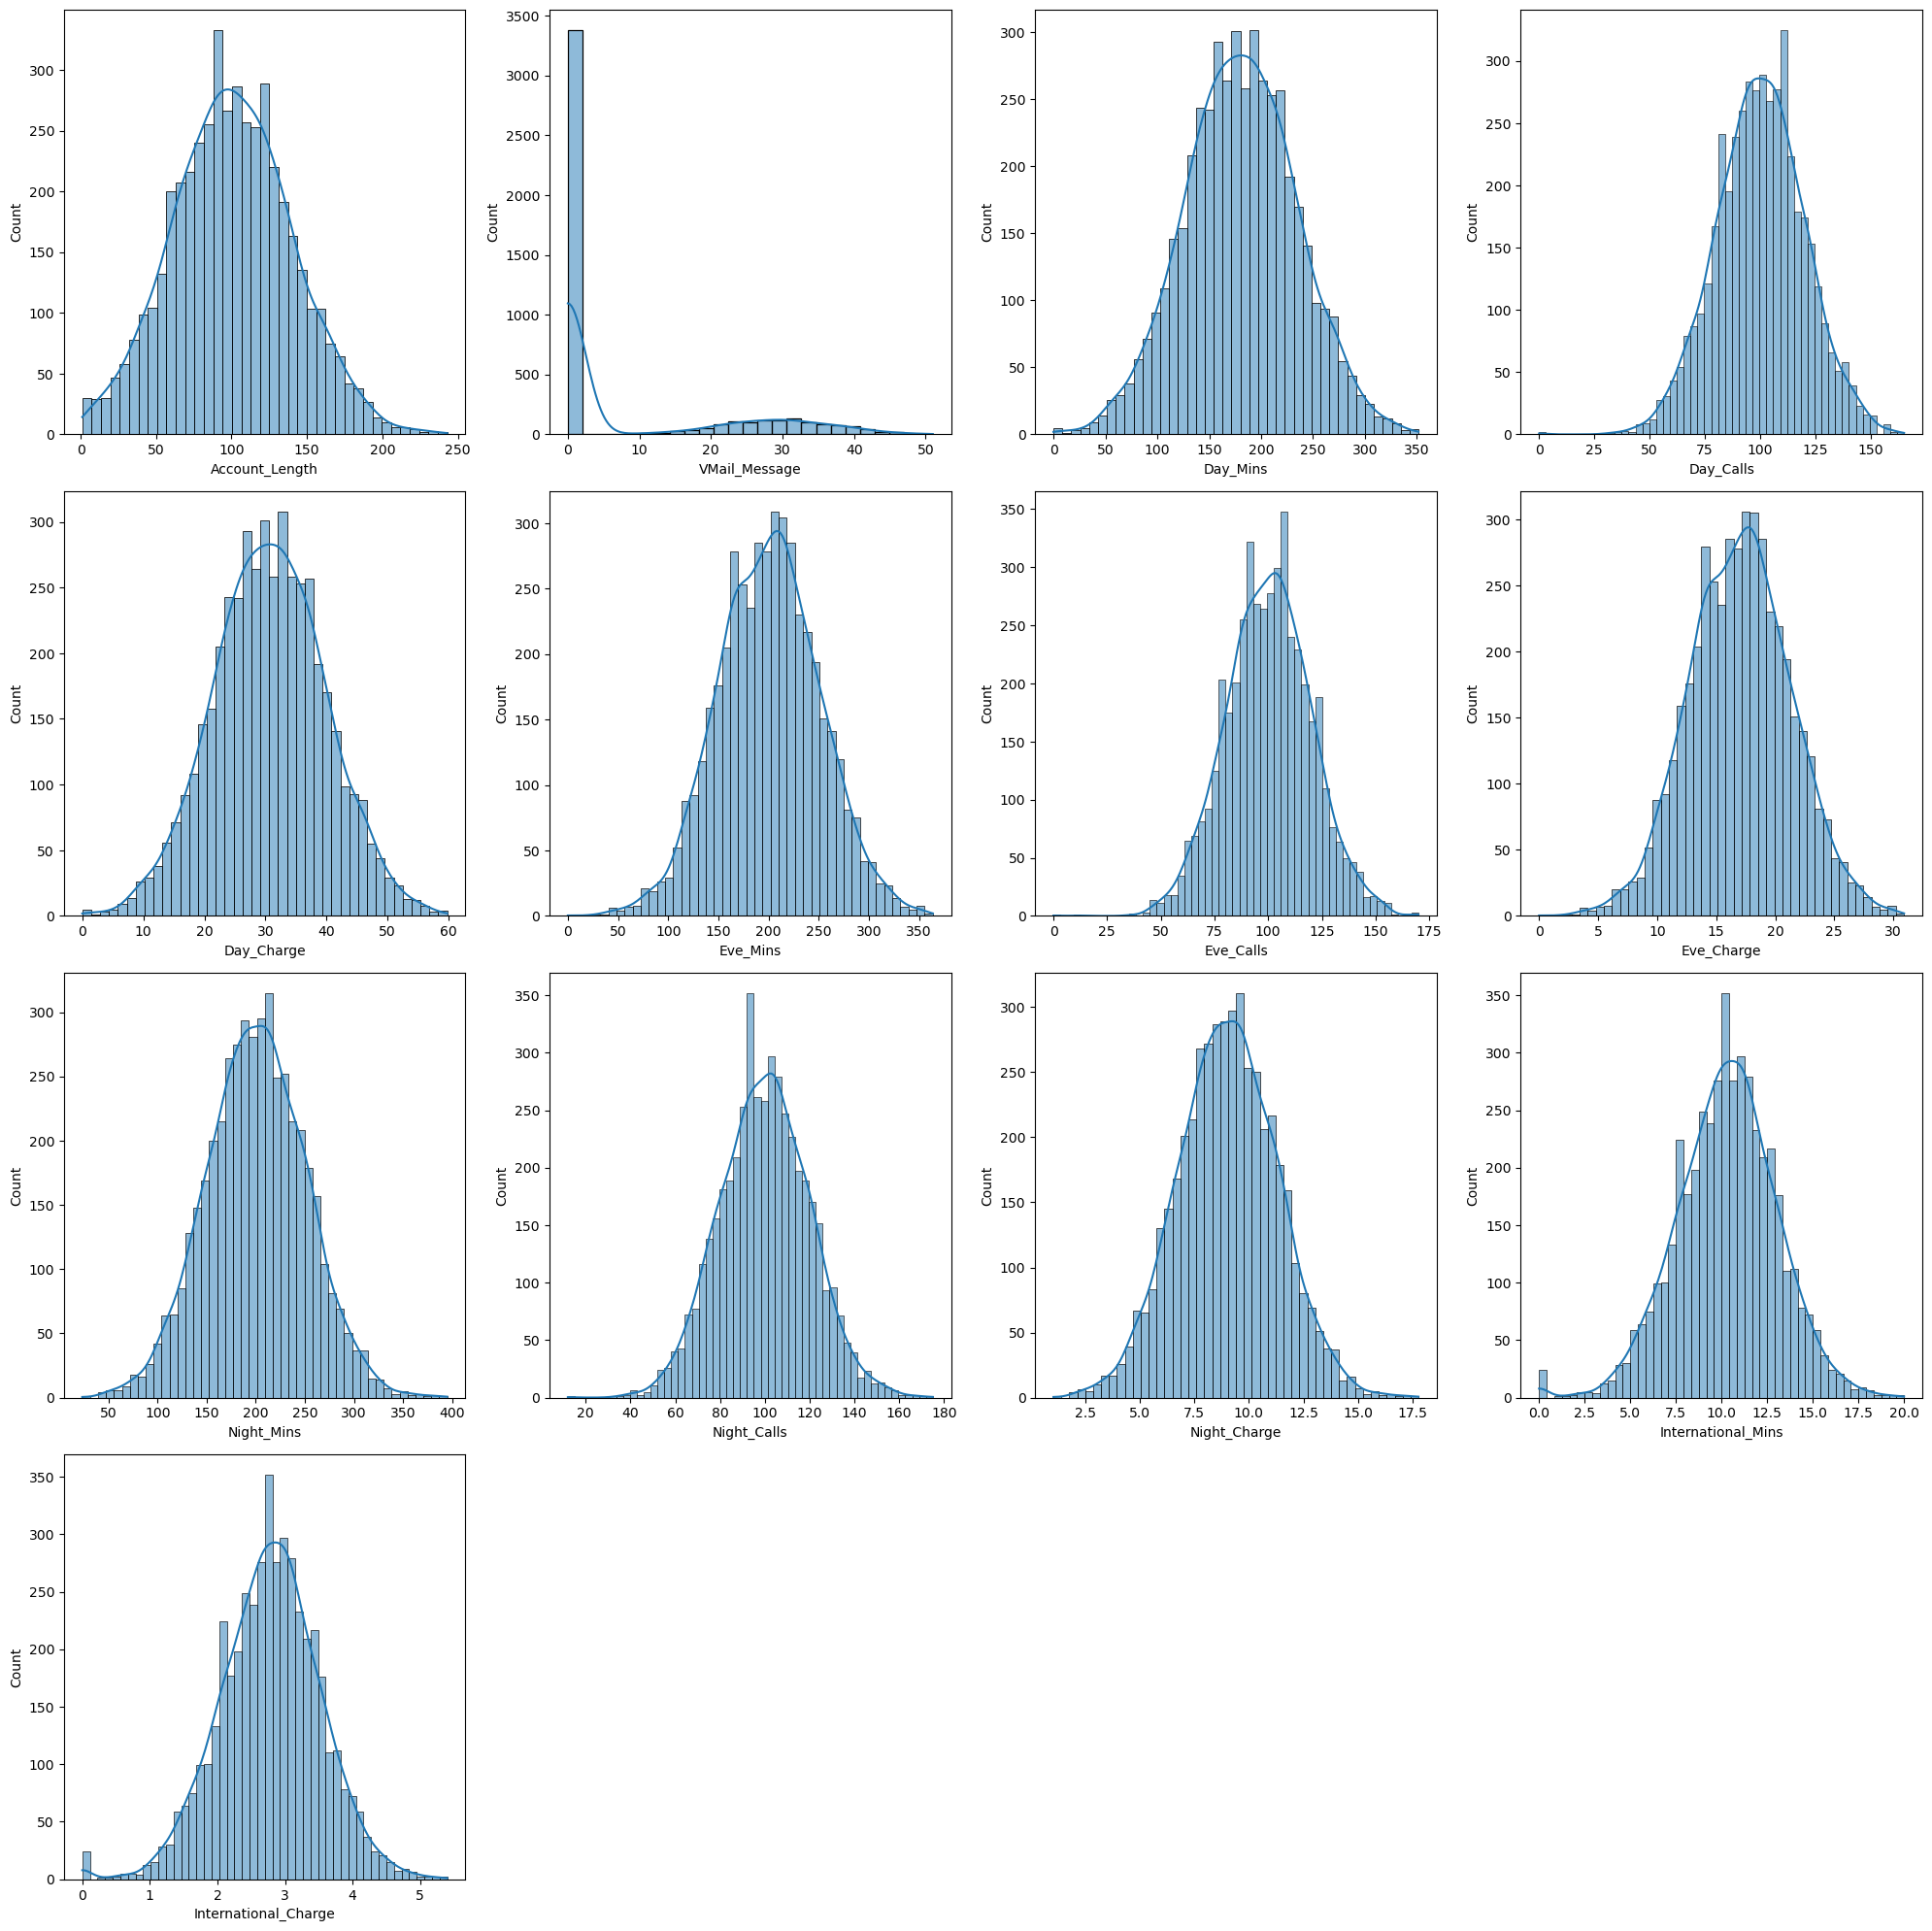

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_num:
    plt.subplot(4,4,plotnumber)
    sns.histplot(x=df_num[i],kde=True)
    plotnumber=plotnumber+1

plt.tight_layout()
plt.show()

#### Bi-variant analysis

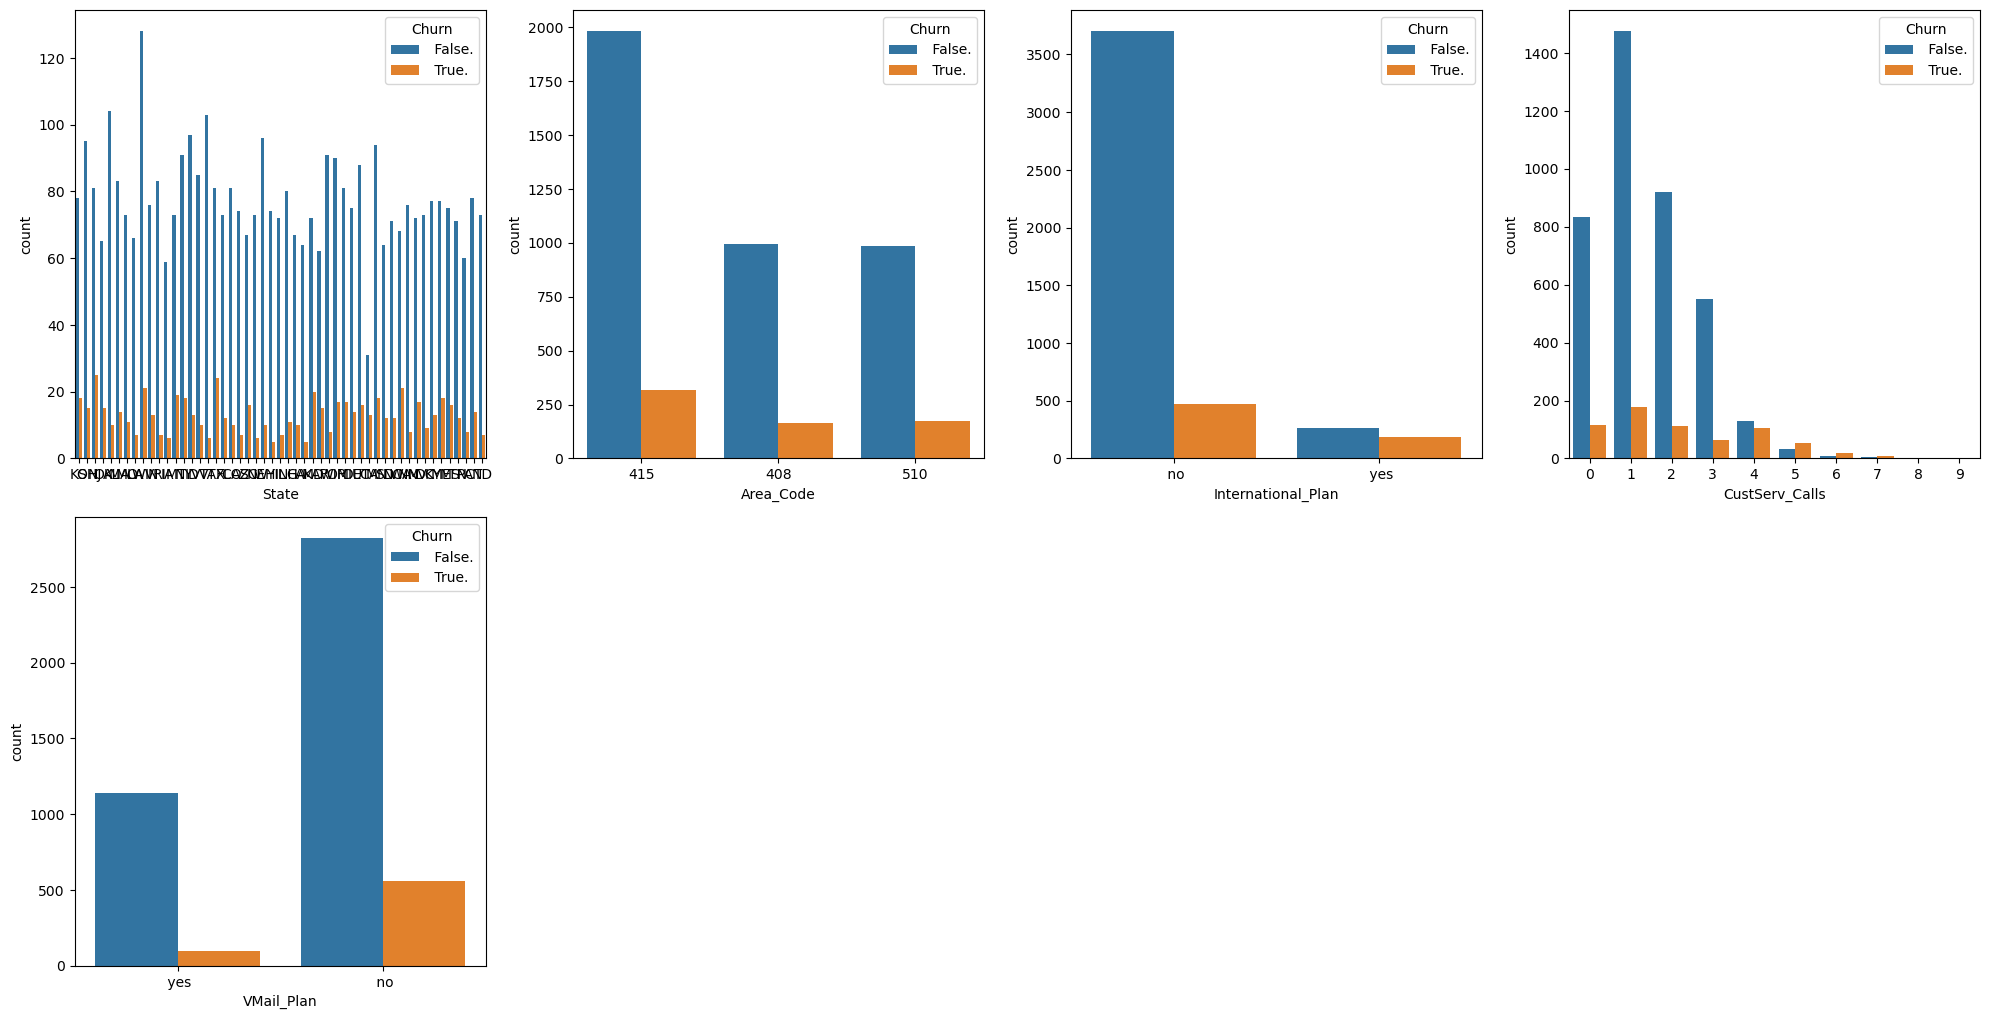

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_cat:
    plt.subplot(4,4,plotnumber)
    sns.countplot(x=df_cat[i],hue = df.Churn)
    plotnumber=plotnumber+1

plt.tight_layout()
plt.show()

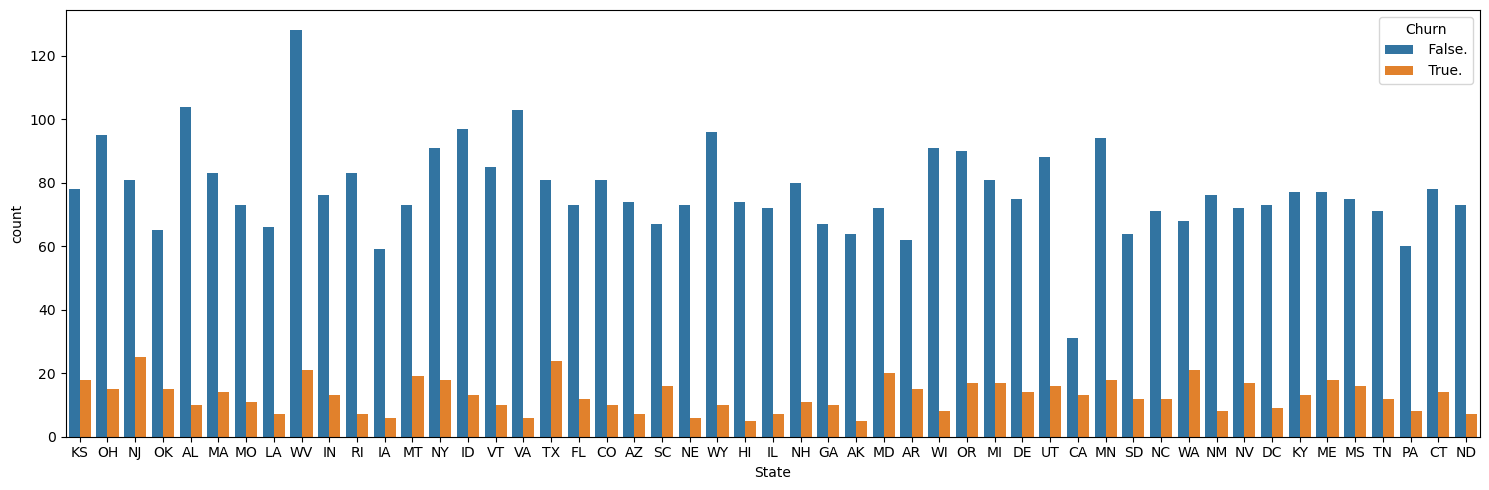

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.State,hue = df.Churn)
plt.tight_layout()
plt.show()

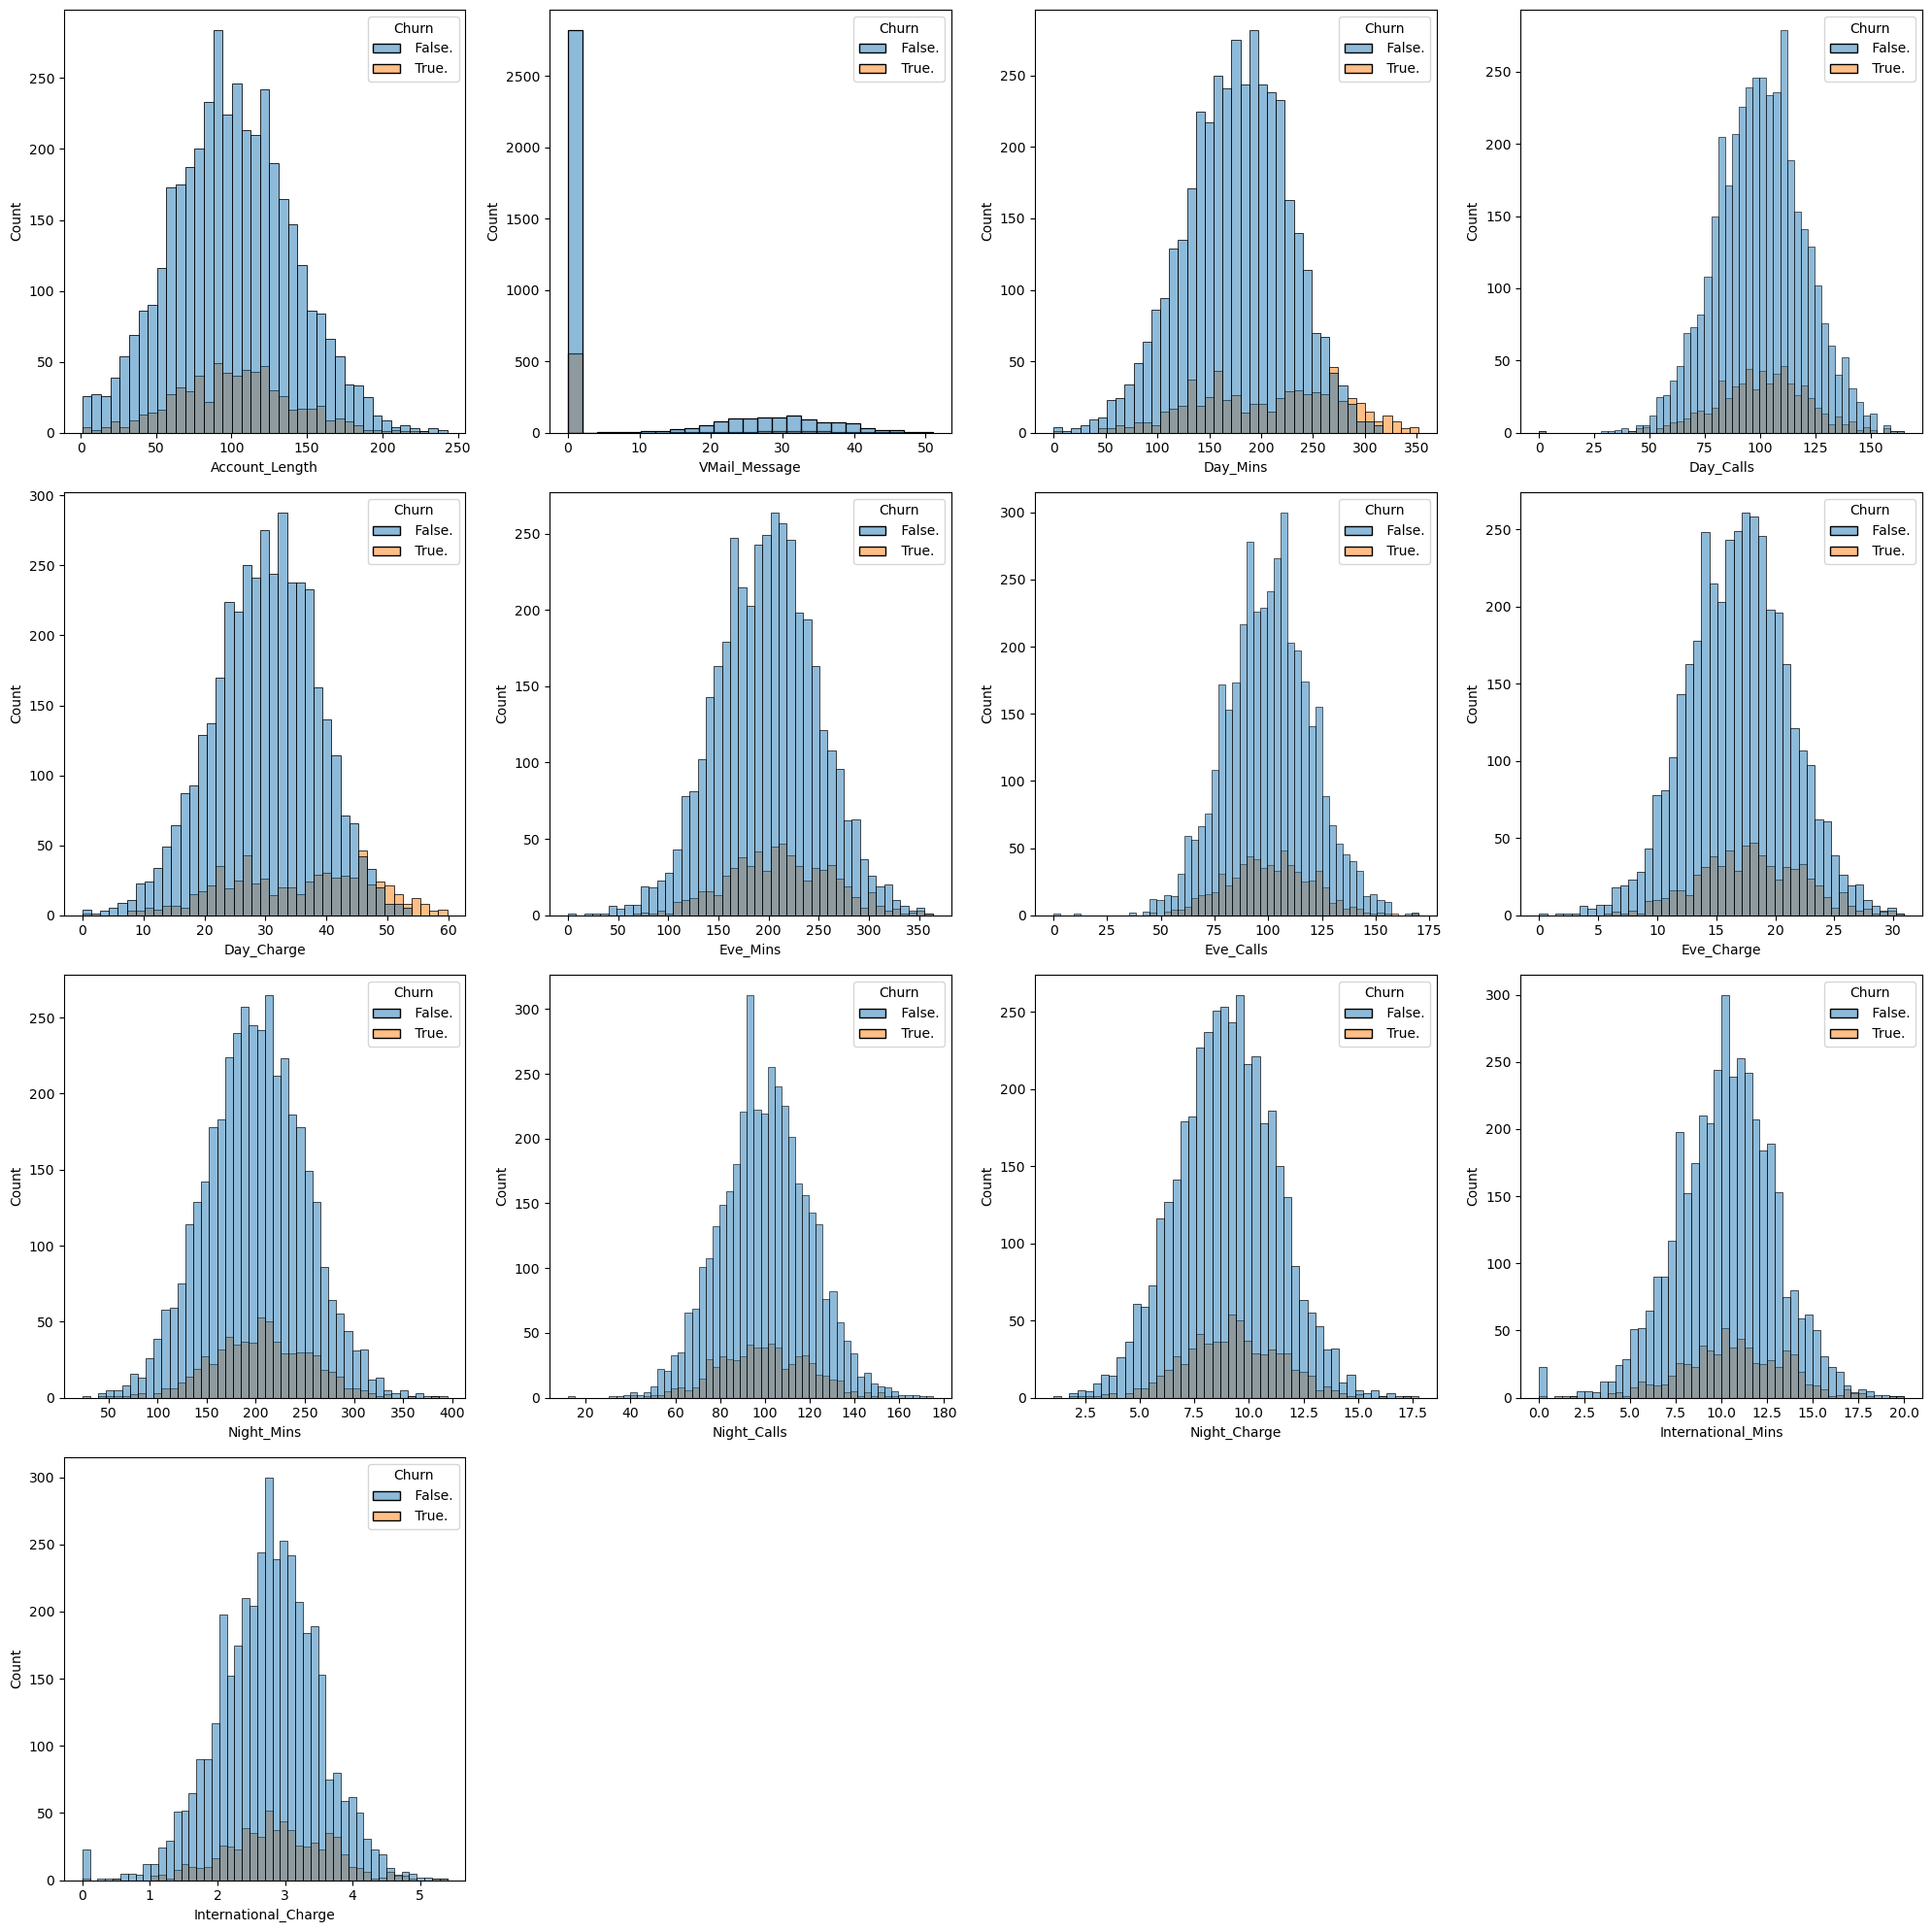

In [32]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_num:
    plt.subplot(4,4,plotnumber)
    sns.histplot(x=df_num[i],hue = df.Churn)
    plotnumber=plotnumber+1

plt.tight_layout()
plt.show()

## Data Preprocessing

#### Handling with null values and corrupted data

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [35]:
null=df.isnull().sum()
perc=df.isnull().sum()/df.shape[0]*100
null_perc=pd.concat([null,perc],axis=1,keys=['Missing Number','Missing Percentage'])
null_perc

,Missing Number,Missing Percentage
State,0,0.0
Account_Length,0,0.0
Area_Code,0,0.0
Phone,0,0.0
International_Plan,0,0.0
VMail_Plan,0,0.0
VMail_Message,0,0.0
Day_Mins,0,0.0
Day_Calls,0,0.0
Day_Charge,0,0.0


In [36]:
df.describe()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Handling Outliers

##### Checking Outliers using boxplot

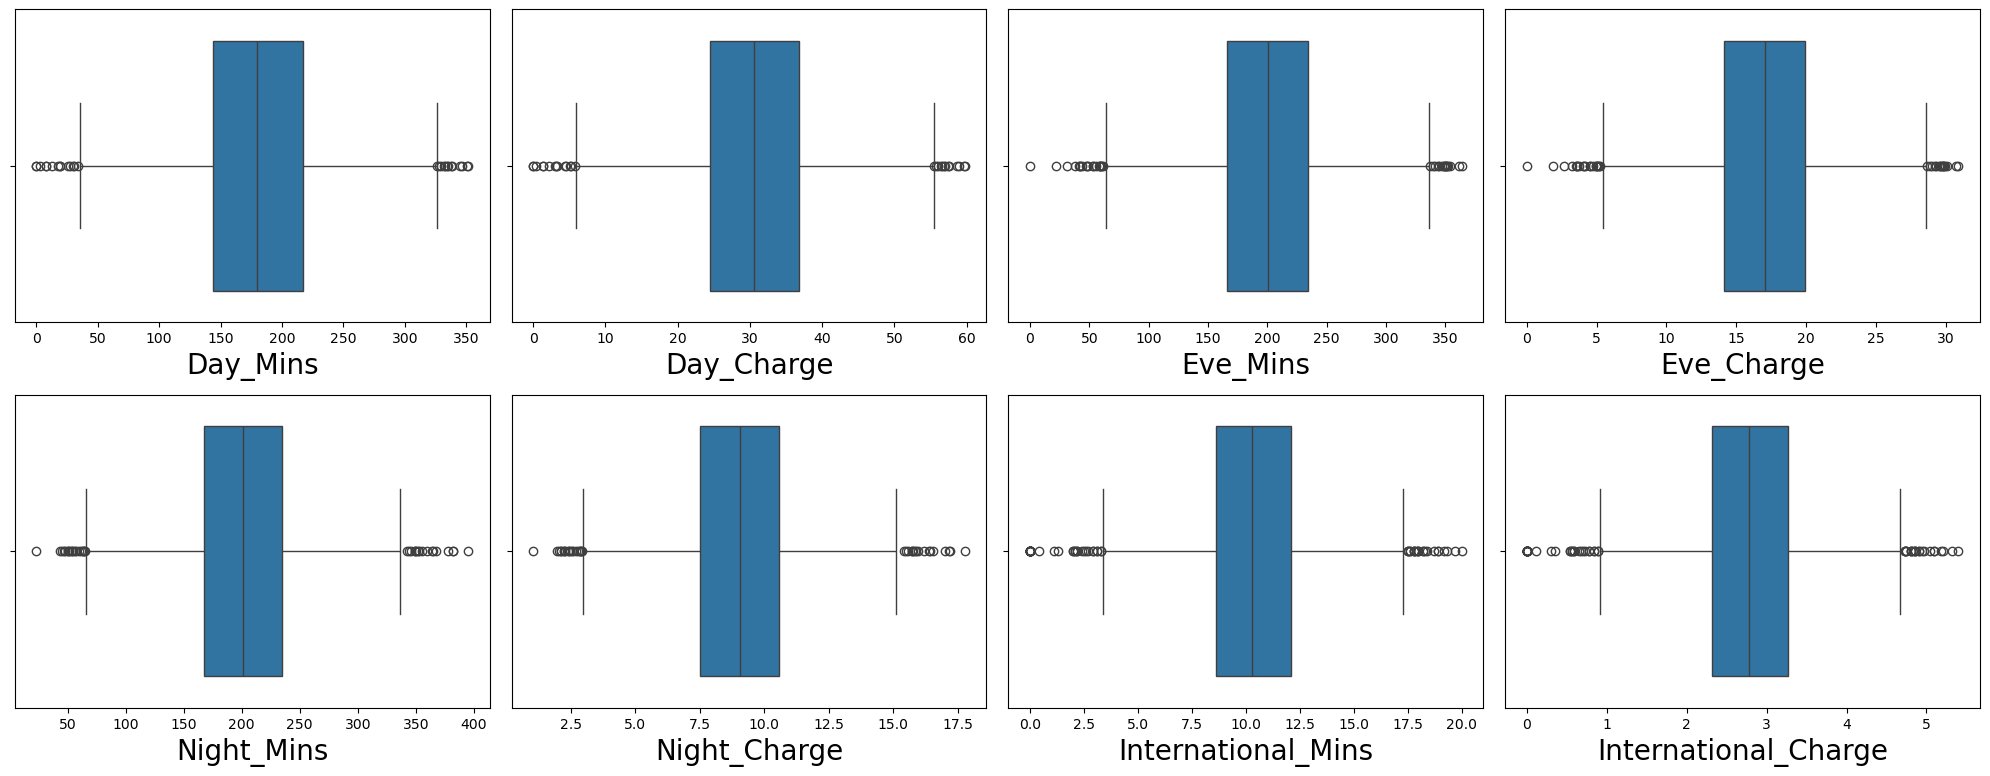

In [37]:
out=df[['Day_Mins','Day_Charge','Eve_Mins','Eve_Charge','Night_Mins','Night_Charge','International_Mins','International_Charge']]

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in out:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(x=out[i])
    plt.xlabel(i,fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

##### Removing outlies using IQR

In [38]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df.Day_Mins) 

# First quartile (Q1) 
Q1 = df.Day_Mins.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Day_Mins.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 73
max_limit 326
min_limit 34


In [39]:
# Calculate the percentage of outliers
len(df.loc[(df['Day_Mins'] >= max_limit) | (df['Day_Mins'] <= min_limit)]) / len(df) * 100

0.5847953216374269

In [40]:
df.loc[df.Day_Mins >=max_limit,'Day_Mins'] 

15      332.9
156     337.4
197     326.5
365     350.8
605     335.5
975     334.3
985     346.8
1679    329.8
2028    328.1
2594    345.3
3442    338.4
3993    351.5
4121    332.1
Name: Day_Mins, dtype: float64

In [41]:
df.loc[df.Day_Mins <=min_limit,'Day_Mins']

685     30.9
741     34.0
1052    12.5
1076    25.9
1345     0.0
1397     0.0
1621    19.5
1986     7.9
2124    27.0
2252    17.6
2736     2.6
2753     7.8
3046    18.9
3174    29.9
Name: Day_Mins, dtype: float64

In [42]:
# Replace values that are greater than or lower than with the median
df.loc[df.Day_Mins >=max_limit,'Day_Mins'] =np.median(df.Day_Mins)
df.loc[df.Day_Mins <=min_limit,'Day_Mins'] =np.median(df.Day_Mins)

In [43]:
IQR = stats.iqr(df.Day_Charge) 

# First quartile (Q1) 
Q1 = df.Day_Charge.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Day_Charge.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 12
max_limit 55
min_limit 5


In [44]:
# Calculate the percentage of outliers
len(df.loc[(df['Day_Charge'] >= max_limit) | (df['Day_Charge'] <= min_limit)]) / len(df) * 100

0.5847953216374269

In [45]:
# Replace values that are greater than or lower than with the median
df.loc[df.Day_Charge >=max_limit,'Day_Charge'] =np.median(df.Day_Charge)
df.loc[df.Day_Charge <=min_limit,'Day_Charge'] =np.median(df.Day_Charge)

In [46]:
IQR = stats.iqr(df.Eve_Mins) 

# First quartile (Q1) 
Q1 = df.Eve_Mins.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Eve_Mins.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 68
max_limit 336
min_limit 63


In [47]:
# Calculate the percentage of outliers
len(df.loc[(df['Eve_Mins'] >= max_limit) | (df['Eve_Mins'] <= min_limit)]) / len(df) * 100

0.7797270955165692

In [48]:
# Replace values that are greater than or lower than with the median
df.loc[df.Eve_Mins >=max_limit,'Eve_Mins'] =np.median(df.Eve_Mins)
df.loc[df.Eve_Mins <=min_limit,'Eve_Mins'] =np.median(df.Eve_Mins)

In [49]:
IQR = stats.iqr(df.Eve_Charge) 

# First quartile (Q1) 
Q1 = df.Eve_Charge.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Eve_Charge.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 5
max_limit 28
min_limit 5


In [50]:
# Calculate the percentage of outliers
len(df.loc[(df['Eve_Charge'] >= max_limit) | (df['Eve_Charge'] <= min_limit)]) / len(df) * 100

0.7797270955165692

In [51]:
# Replace values that are greater than or lower than with the median
df.loc[df.Eve_Charge >=max_limit,'Eve_Charge'] =np.median(df.Eve_Charge)
df.loc[df.Eve_Charge <=min_limit,'Eve_Charge'] =np.median(df.Eve_Charge)

In [52]:
IQR = stats.iqr(df.Night_Mins) 

# First quartile (Q1) 
Q1 = df.Night_Mins.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Night_Mins.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 67
max_limit 336
min_limit 65


In [53]:
# Calculate the percentage of outliers
len(df.loc[(df['Night_Mins'] >= max_limit) | (df['Night_Mins'] <= min_limit)]) / len(df) * 100

0.7797270955165692

In [54]:
# Replace values that are greater than or lower than with the median
df.loc[df.Night_Mins >=max_limit,'Night_Mins'] =np.median(df.Night_Mins)
df.loc[df.Night_Mins <=min_limit,'Night_Mins'] =np.median(df.Night_Mins)

In [55]:
IQR = stats.iqr(df.Night_Charge) 

# First quartile (Q1) 
Q1 = df.Night_Charge.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Night_Charge.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 3
max_limit 15
min_limit 2


In [56]:
# Calculate the percentage of outliers
len(df.loc[(df['Night_Charge'] >= max_limit) | (df['Night_Charge'] <= min_limit)]) / len(df) * 100

0.7797270955165692

In [57]:
#Replace values that are greater than or lower than with the median
df.loc[df.Night_Charge >=max_limit,'Night_Charge'] =np.median(df.Night_Charge)
df.loc[df.Night_Charge <=min_limit,'Night_Charge'] =np.median(df.Night_Charge)

In [58]:
IQR = stats.iqr(df.International_Mins) 

# First quartile (Q1) 
Q1 = df.International_Mins.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.International_Mins.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 3
max_limit 17
min_limit 3


In [59]:
# Calculate the percentage of outliers
len(df.loc[(df['International_Mins'] >= max_limit) | (df['International_Mins'] <= min_limit)]) / len(df) * 100

1.4078405891271388

In [60]:
#Replace values that are greater than or lower than with the median
df.loc[df.International_Mins >=max_limit,'International_Mins'] =np.median(df.International_Mins)
df.loc[df.International_Mins <=min_limit,'International_Mins'] =np.median(df.International_Mins)

In [61]:
IQR = stats.iqr(df.International_Charge) 

# First quartile (Q1) 
Q1 = df.International_Charge.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.International_Charge.quantile(0.75)

##getting  min and max limit calculation
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print('IQR',int(IQR))
print('max_limit',int(max_limit))
print('min_limit',int(min_limit))

IQR 0
max_limit 4
min_limit 0


In [62]:
# Calculate the percentage of outliers
len(df.loc[(df['International_Charge'] >= max_limit) | (df['International_Charge'] <= min_limit)]) / len(df) * 100

1.4078405891271388

In [63]:
#Replace values that are greater than or lower than with the median
df.loc[df.International_Charge >=max_limit,'International_Charge'] =np.median(df.International_Charge)
df.loc[df.International_Charge <=min_limit,'International_Charge'] =np.median(df.International_Charge)

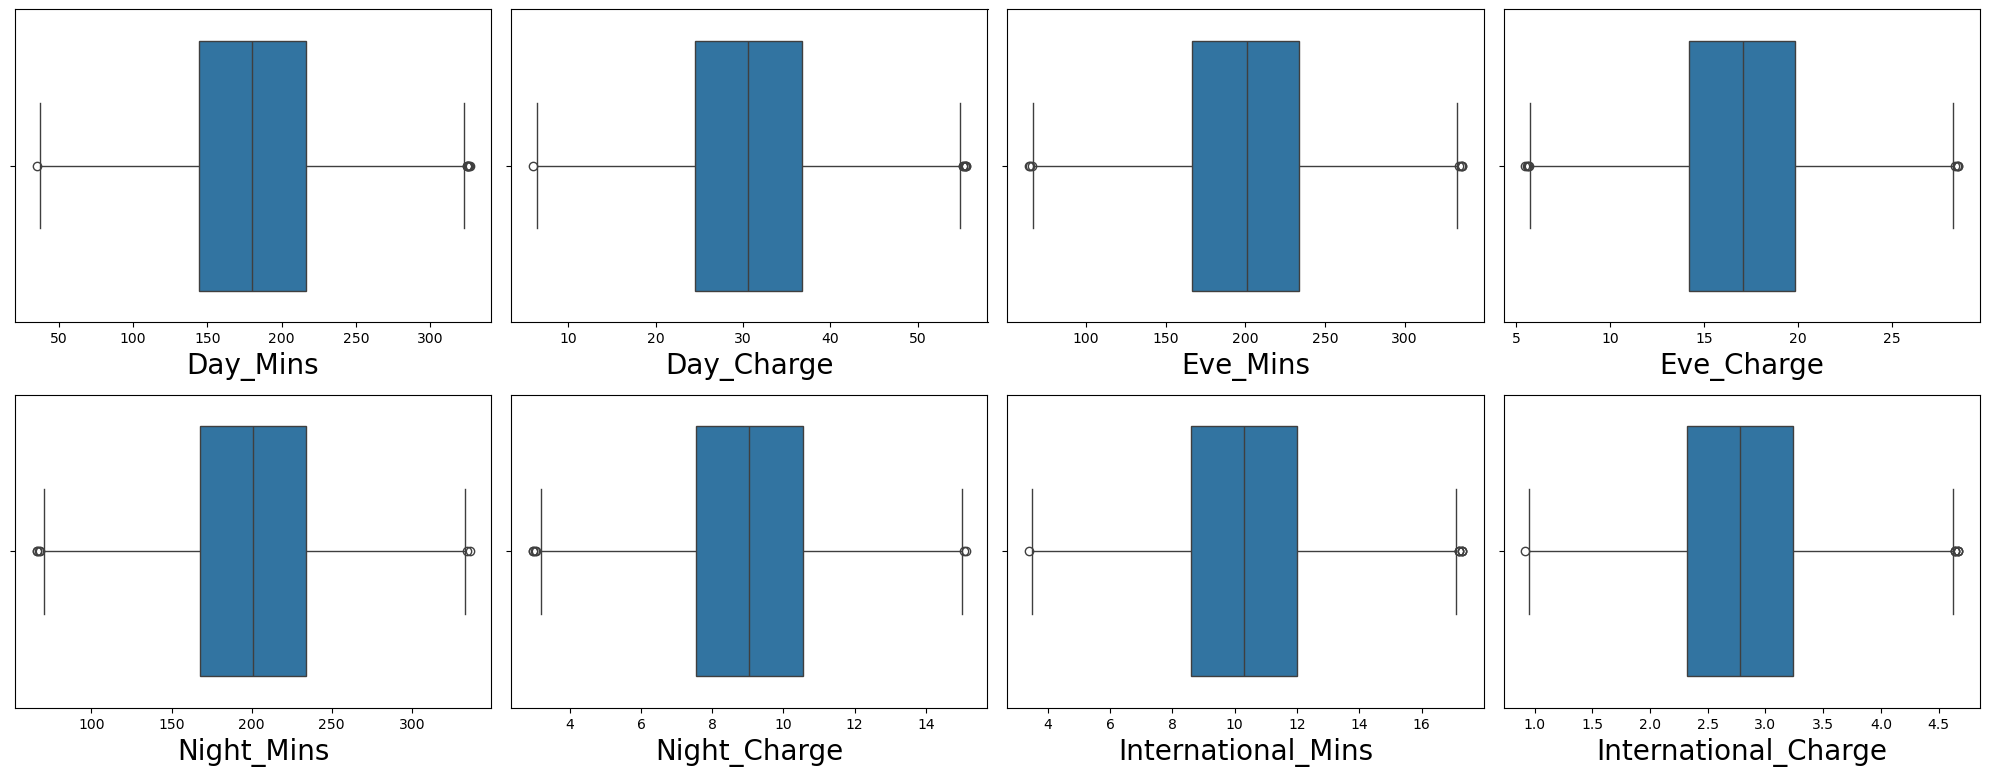

In [64]:
out_after=df[['Day_Mins','Day_Charge','Eve_Mins','Eve_Charge','Night_Mins','Night_Charge','International_Mins','International_Charge']]

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in out_after:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(x=out_after[i])
    plt.xlabel(i,fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

#### Feature Encoding(Conversion of categorical data to numerical data)

In [65]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,200.8,88,17.07,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [66]:
# Get all categorical feature list
list(df.select_dtypes('object'))

['State', 'Area_Code', 'Phone', 'International_Plan', 'VMail_Plan', 'Churn']

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [68]:
# Get value counts of International_Plan
df.International_Plan.value_counts()

International_Plan
 no     4171
 yes     446
Name: count, dtype: int64

In [69]:
# Use label encoding to map the labels
df.International_Plan=le.fit_transform(df.International_Plan)

In [70]:
#  Checking conversion happen or not
df.International_Plan.value_counts()

International_Plan
0    4171
1     446
Name: count, dtype: int64

In [71]:
# Get value counts of VMail_Plan
df.VMail_Plan.value_counts()

VMail_Plan
 no     3381
 yes    1236
Name: count, dtype: int64

In [72]:
# Use label encoding to map the labels
df.VMail_Plan=le.fit_transform(df.VMail_Plan)

In [73]:
#  Checking conversion happen or not
df.VMail_Plan.value_counts()

VMail_Plan
0    3381
1    1236
Name: count, dtype: int64

In [74]:
# Get value counts of Churn
df.Churn.value_counts()

Churn
 False.    3961
 True.      656
Name: count, dtype: int64

In [75]:
# Use label encoding to map the labels
df.Churn=le.fit_transform(df.Churn)

In [76]:
#  Checking conversion happen or not
df.Churn.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [77]:
df.rename(columns={'Churn': 'Churn_Flag'}, inplace=True)

In [78]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn_Flag
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,200.8,88,17.07,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Distribution of mean of the data

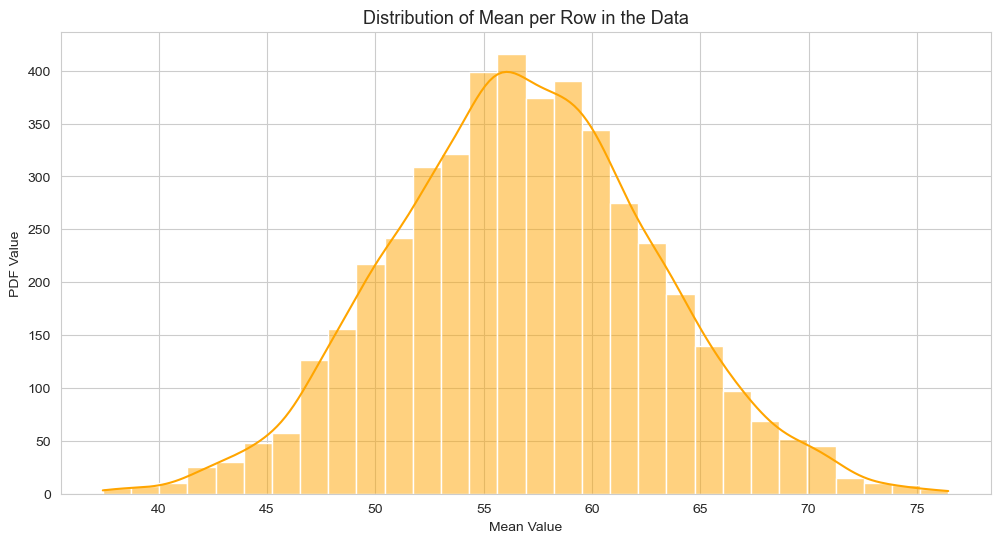

In [79]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Select features 
features = df.columns.values[4:21]

# Calculate mean per row
row_means = df[features].mean(axis=1)

# Use histplot or kdeplot for distribution
sns.histplot(row_means, color='orange', kde=True, bins=30)

plt.title('Distribution of Mean per Row in the Data', fontsize=13)
plt.xlabel('Mean Value', fontsize=10)
plt.ylabel('PDF Value', fontsize=10)

plt.show()

#### Distribution of Standard Deviation of the data

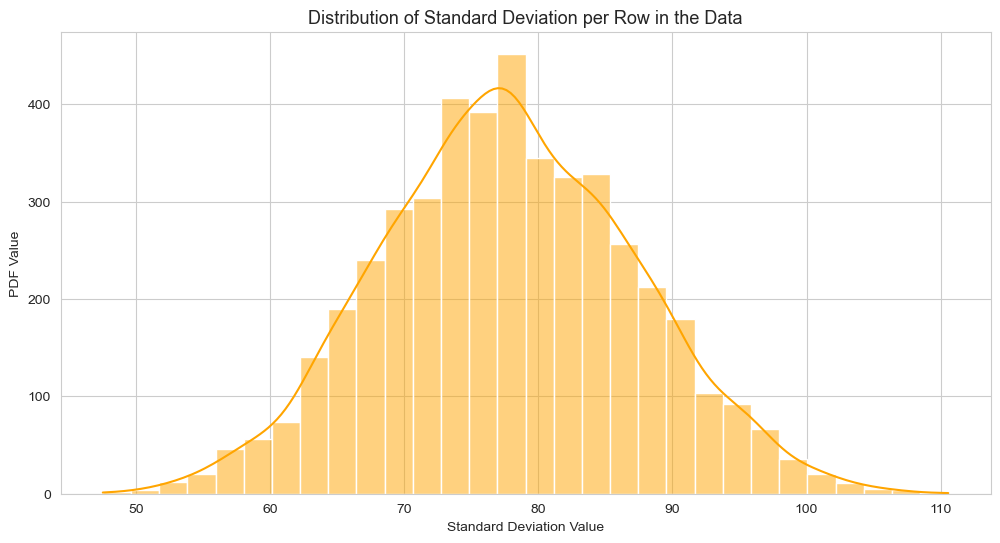

In [80]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Select features 
features = df.columns.values[4:21]

# Calculate mean per row
row_means = df[features].std(axis=1)

# Use histplot or kdeplot for distribution
sns.histplot(row_means, color='orange', kde=True, bins=30)

plt.title('Distribution of Standard Deviation per Row in the Data', fontsize=13)
plt.xlabel('Standard Deviation Value', fontsize=10)
plt.ylabel('PDF Value', fontsize=10)

plt.show()

## FEATURE SELECTION

From EDA we observed feature VMail_Message have 73% zero values may not provide significant information so we can remove that

In [81]:
#Droping unwanted columns
df.drop(['State','VMail_Message','Account_Length','Area_Code','Phone'],axis=1,inplace=True)

##### Checking correlation

In [82]:
df_num.corr()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Charge
Account_Length,1.000000,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.003501
VMail_Message,-0.012983,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.005202
Day_Mins,0.002002,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,-0.012261
Day_Calls,0.032783,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.013055
Day_Charge,0.001999,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,-0.012262
Eve_Mins,-0.006778,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.000172
Eve_Calls,0.015598,-0.006508,0.012990,0.003923,0.012992,0.001135,1.000000,0.001151,0.002610,-0.015463,0.002624,-0.002798,-0.002831
Eve_Charge,-0.006775,0.017878,-0.010268,-0.006429,-0.010262,1.000000,0.001151,1.000000,-0.018839,0.014231,-0.018846,0.000163,0.000170
Night_Mins,-0.002077,0.004672,0.009604,0.010730,0.009606,-0.018830,0.002610,-0.018839,1.000000,0.025742,0.999999,-0.004549,-0.004500
Night_Calls,-0.009482,0.000889,0.005165,-0.013299,0.005164,0.014226,-0.015463,0.014231,0.025742,1.000000,0.025722,-0.006431,-0.006439


<Axes: >

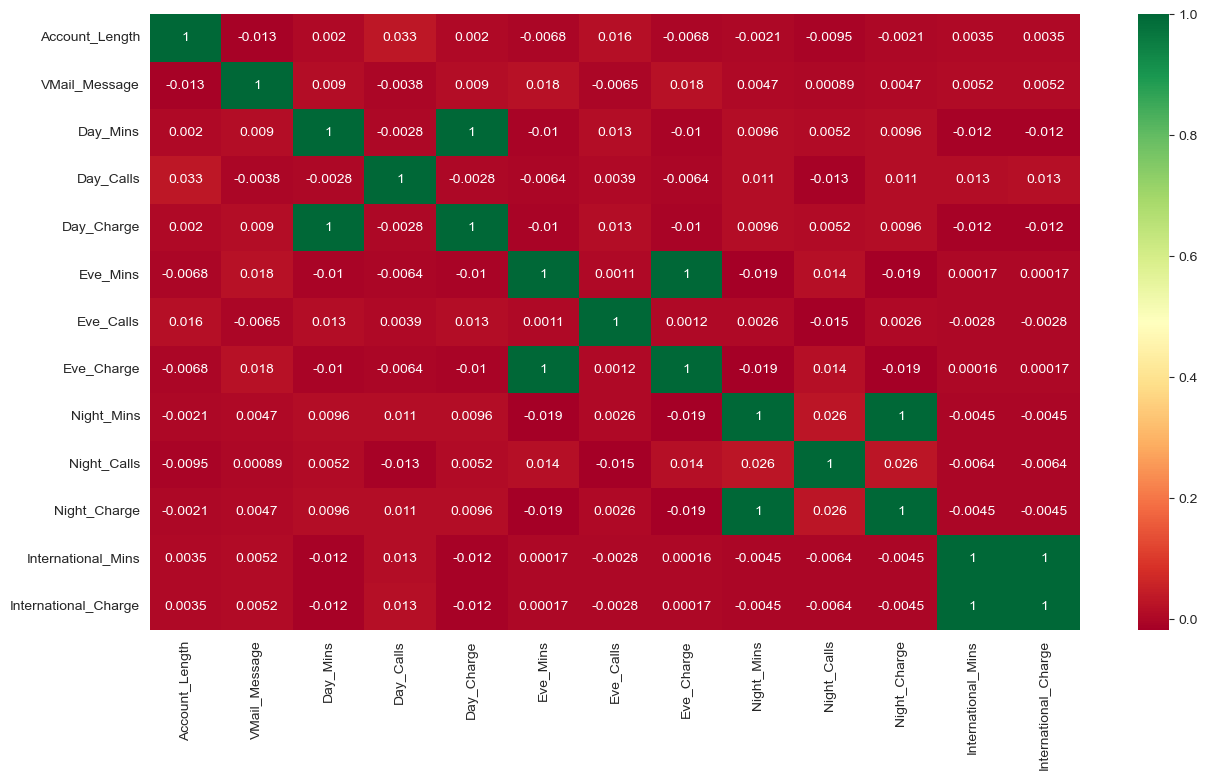

In [83]:
# Checking  Correlation with heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True , cmap='RdYlGn')

In [84]:
 #Check highly corelated features 
pd.set_option('display.max_rows',None)
corrmat = df_num.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,Day_Mins,Day_Charge,1.000000
1,Day_Charge,Day_Mins,1.000000
2,Eve_Charge,Eve_Mins,1.000000
3,Eve_Mins,Eve_Charge,1.000000
4,Night_Charge,Night_Mins,0.999999
5,Night_Mins,Night_Charge,0.999999
6,International_Mins,International_Charge,0.999993
7,International_Charge,International_Mins,0.999993


There are some highly correlated features in data  ,we can remove those features

In [85]:
df.drop(['Day_Mins','Eve_Charge','Night_Charge','International_Mins'],axis=1, inplace=True)

In [86]:
df.duplicated().sum()

0

In [87]:
df.head()

,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_calls,International_Charge,CustServ_Calls,Churn_Flag
0,0,1,110,45.07,197.4,99,244.7,91,3,2.70,1,0
1,0,1,123,27.47,195.5,103,254.4,103,3,3.70,1,0
2,0,0,114,41.38,121.2,110,162.6,104,5,3.29,0,0
3,1,0,71,50.90,200.8,88,196.9,89,7,1.78,2,0
4,1,0,113,28.34,148.3,122,186.9,121,3,2.73,3,0


## MODEL CREATION

In [88]:
x = df.iloc[:,:-1] # Independed variables
y = df.Churn_Flag  # Depended variable

#### Train Test Split the data

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split (x, y, test_size=0.20, random_state=18)

In [91]:
y_train.value_counts()

Churn_Flag
0    3141
1     552
Name: count, dtype: int64

Its Imbalanced, so we need to do balance the data

#### Balancing

In [92]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
x_sm,y_sm = sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 3961, 1: 656})
balanced data:    : Counter({0: 3961, 1: 3961})


In [93]:
## training and testing data shape
print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(3693, 11)
(3693,)
------------Test Set------------------
(924, 11)
(924,)


#### Scalling(feature normalization)

In [94]:
df.head()

,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_calls,International_Charge,CustServ_Calls,Churn_Flag
0,0,1,110,45.07,197.4,99,244.7,91,3,2.70,1,0
1,0,1,123,27.47,195.5,103,254.4,103,3,3.70,1,0
2,0,0,114,41.38,121.2,110,162.6,104,5,3.29,0,0
3,1,0,71,50.90,200.8,88,196.9,89,7,1.78,2,0
4,1,0,113,28.34,148.3,122,186.9,121,3,2.73,3,0


In [95]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()

In [96]:
#scalling train data
x_train[['Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_calls','International_Charge','CustServ_Calls']]=ms.fit_transform(x_train[['Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_calls','International_Charge','CustServ_Calls']])
x_train.head()

,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_calls,International_Charge,CustServ_Calls
3322,0,0,0.636364,0.982222,0.739660,0.717647,0.424343,0.368098,0.10,0.580645,0.444444
325,0,1,0.630303,0.081414,0.569793,0.629412,0.320015,0.650307,0.15,0.260753,0.000000
1247,0,0,0.400000,0.283232,0.549483,0.635294,0.642619,0.503067,0.25,0.384409,0.111111
2109,0,1,0.606061,0.410303,0.651403,0.641176,0.348502,0.613497,0.05,0.658602,0.333333
3025,0,1,0.636364,0.557980,0.054653,0.505882,0.203478,0.429448,0.60,0.876344,0.222222


In [97]:
#scalling test data
x_test[['Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_calls','International_Charge','CustServ_Calls']]=ms.transform(x_test[['Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_calls','International_Charge','CustServ_Calls']])
x_test.head()

,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_calls,International_Charge,CustServ_Calls
3245,0,0,0.612121,0.261212,0.210118,0.552941,0.425453,0.447853,0.10,0.658602,0.333333
1712,0,0,0.442424,0.478788,0.548375,0.670588,0.365890,0.638037,0.25,0.491935,0.444444
1287,0,0,0.654545,0.553535,0.264402,0.564706,0.328894,0.460123,0.15,0.303763,0.222222
2472,0,0,0.727273,0.352727,0.593058,0.647059,0.293748,0.509202,0.30,0.483871,0.111111
2242,0,0,0.533333,0.514747,0.589734,0.576471,0.542360,0.570552,0.15,0.572581,0.222222


### MODEL FITTING

## 1 LOGISTIC REGRESSION

In [98]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
LR = LogisticRegression()

# Step:3 fitting traing data
LR.fit(x_train,y_train)

# Step:4 Prediction on training data
LR_train_pred = LR.predict(x_train)

# Step:5 Prediction on test data
LR_test_pred = LR.predict(x_test)


#### Training accuracy of Logistic Regression


In [99]:
lr_train_acc=accuracy_score(LR_train_pred,y_train)
print('Training accuracy of Logistic regression',lr_train_acc*100)
print('Logistic regression training Classification report: \n',classification_report(LR_train_pred,y_train))

Training accuracy of Logistic regression 85.54021121039806
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      3533
           1       0.16      0.56      0.25       160

    accuracy                           0.86      3693
   macro avg       0.57      0.71      0.58      3693
weighted avg       0.94      0.86      0.89      3693



#### Testing accuracy of Logistic Regression

In [100]:
lr_test_acc = accuracy_score(LR_test_pred,y_test)
print('Testing accuracy of Logistic regression',lr_test_acc*100)
print('Logistic regression Testing Classification report: \n',classification_report(LR_test_pred,y_test))

Testing accuracy of Logistic regression 89.06926406926407
Logistic regression Testing Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       883
           1       0.21      0.54      0.30        41

    accuracy                           0.89       924
   macro avg       0.59      0.72      0.62       924
weighted avg       0.94      0.89      0.91       924



#### Cross validation of Logistic Regression

In [101]:
# Step:1 Create logistic regression object
LR_cv = LogisticRegression()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

# Step:3 compute cross validation accuracy scores
cv_score = cross_val_score(LR_cv, x_sm, y_sm, scoring='accuracy', cv = 5)

print(cv_score)
print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())  ## std < 0.05 is good

[0.66498423 0.74258675 0.73169192 0.70517677 0.68371212]
mean score  0.7056303571997578
satandard deviation 0.028905718266580137


#### Baging of Logistic Regression

In [102]:
# Step:1 Create logistic regression object
LR_bag = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=LR_bag,n_estimators=20)   #base_estimator---> algorithm which you want to pass
                                                                  #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 89.06926406926407


#### Hyperparameter tuning of Logistic Regression

In [103]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import GridSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {
               'C': np.logspace(-4, 4, 20),
               'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'solver': ['liblinear', 'saga'],  # Include 'lbfgs' if not using 'l1'
               'class_weight': [None, 'balanced']}

#Step:3 Object creation
LR2=LogisticRegression()

# Step:4 Create Grid search CV with parameter
grid_cv_lr = GridSearchCV(estimator=LR2,scoring='accuracy',param_grid=param_grid,
                                 cv=3,verbose=2,n_jobs=-1)

# Step:5 Fitting the training data
grid_cv_lr.fit(x_train,y_train)

# Step:6 Get best parameter
lr_best_params = grid_cv_lr.best_params_
print(f"Best parameter: {lr_best_params}")

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Best parameter: {'C': 0.615848211066026, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}


In [104]:
# Step:7 Create object and place the best paramter
LR_hyper = LogisticRegression(**lr_best_params)

# Step:8 Fitting the training data
LR_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
lr_hyper_pred = LR_hyper.predict(x_test)

# Step 10: Evaluate the model after hyperparameter
lr_hyper_acc = accuracy_score(lr_hyper_pred,y_test)
print('Testing accuracy of LR after tuning',lr_hyper_acc*100)
print('Testing classification report:\n',classification_report(lr_hyper_pred,y_test))

Testing accuracy of LR after tuning 88.74458874458875
Testing classification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       888
           1       0.17      0.50      0.26        36

    accuracy                           0.89       924
   macro avg       0.58      0.70      0.60       924
weighted avg       0.95      0.89      0.91       924



Logistic Regression Training Accuracy: 85.5% ,Testing Accuracy: 89.% , Accuracy after cross validation:70% , Accuracy after bagging: 89% ,Accuracy after tuning: 88.7%

## 2.KNeighborsClassifier(KNN)

In [105]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier

error_rate = []   # Creating empty list

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred_knn = KNN.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
print("Error rate:",error_rate)   

Error rate: [0.11363636363636363, 0.08982683982683982, 0.08982683982683982, 0.08008658008658008, 0.07900432900432901, 0.08008658008658008, 0.07575757575757576, 0.07575757575757576, 0.07142857142857142, 0.07575757575757576]


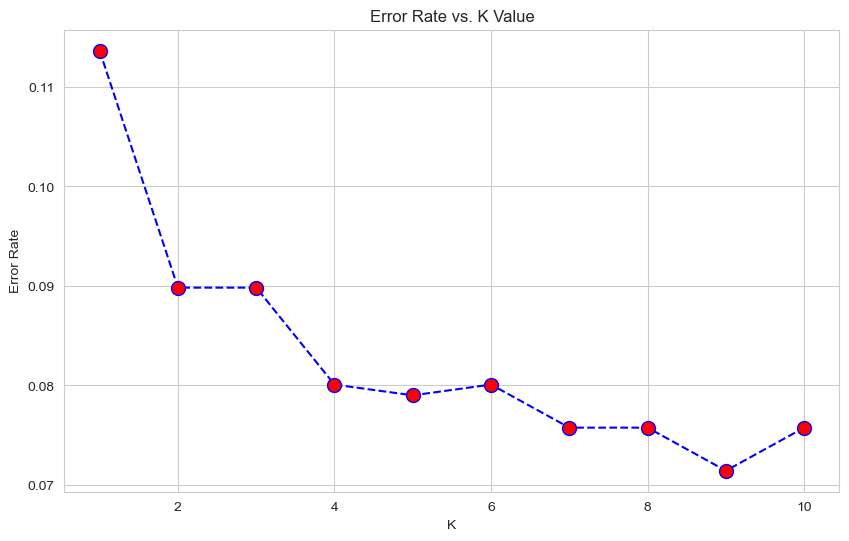

In [106]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [107]:
# Step:3 Get nearst neighbors
KNN2 = KNeighborsClassifier(n_neighbors=7)

# Step:4 Fitting the training data
KNN2.fit(x_train,y_train)


# Step:5 Prediction on training data
KNN_train_pred = KNN2.predict(x_train)

# Step:6 Prediction on testing data
KNN_test_pred = KNN2.predict(x_test)

#### Training accuracy of KNN

In [108]:
knn_train_acc=accuracy_score(KNN_train_pred,y_train)
print('Training accuracy of KNN',knn_train_acc*100)
print('KNN Training classification report:\n',classification_report(KNN_train_pred,y_train))

Training accuracy of KNN 91.95775792038992
KNN Training classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      3392
           1       0.50      0.92      0.65       301

    accuracy                           0.92      3693
   macro avg       0.75      0.92      0.80      3693
weighted avg       0.95      0.92      0.93      3693



#### Testing accuracy of KNN

In [109]:
knn_test_acc=accuracy_score(KNN_test_pred,y_test)
print('Testing accuraco of KNN',knn_test_acc*100)
print('KNN Testing classification report:\n',classification_report(KNN_test_pred,y_test))

Testing accuraco of KNN 92.42424242424242
KNN Testing classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       872
           1       0.41      0.83      0.55        52

    accuracy                           0.92       924
   macro avg       0.70      0.88      0.75       924
weighted avg       0.96      0.92      0.94       924



#### Cross validation of KNN

In [110]:
# Step:1 Create KNN object
KNN_cv = KNeighborsClassifier()

# Step:2 importing library
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(KNN_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)
print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.78990536 0.829653   0.82449495 0.82512626 0.82323232]
mean score  0.8184823789949972
satandard deviation 0.014451869935202878


#### Bagging of KNN

In [111]:
# Step:1 Create  KNeighborsClassifier object
KNN_bag = KNeighborsClassifier()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=KNN_bag,n_estimators=20)    #base_estimator---> algorithm which you want to pass
                                                                    #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 92.20779220779221


KNN Training Accuracy: 92% Testing Accuracy : 92.5% Accuracy after cross validation:81.5% Testing Accuracy after bagging: 92.5%

## 3.Support Vector Machine (SVM)

In [112]:
# Step:1 importing model library
from sklearn.svm import SVC

# Step:2 Object creation
SVM=SVC()

# Step:3 Fitting the training data
SVM.fit(x_train,y_train)

# Step:4 Prediction on training data
SVM_train_pred=SVM.predict(x_train)

# Step:5 Prediction on testing data
SVM_test_pred=SVM.predict(x_test)

#### Training accuracy of SVM

In [113]:
svm_train_acc=accuracy_score(SVM_train_pred,y_train)
print('Training accuracy of SVM',svm_train_acc*100)
print('SVM Training classification report:\n',classification_report(SVM_train_pred,y_train))

Training accuracy of SVM 91.55158407798538
SVM Training classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      3395
           1       0.49      0.90      0.63       298

    accuracy                           0.92      3693
   macro avg       0.74      0.91      0.79      3693
weighted avg       0.95      0.92      0.93      3693



#### Testing accuracy of SVM

In [114]:
svm_test_acc=accuracy_score(SVM_test_pred,y_test)
print('Testing accuracy of SVM',svm_test_acc*100)
print('SVM Testing classification report:\n',classification_report(SVM_test_pred,y_test)) 

Testing accuracy of SVM 93.29004329004329
SVM Testing classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       860
           1       0.51      0.83      0.63        64

    accuracy                           0.93       924
   macro avg       0.75      0.88      0.80       924
weighted avg       0.95      0.93      0.94       924



#### Cross validation of SVM

In [115]:
# Step:1 Create SVC object
SVM_cv =SVC()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(SVM_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)

print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.61324921 0.64037855 0.6489899  0.63320707 0.63005051]
mean score  0.6331750469999682
satandard deviation 0.011906323505026184


##### Bagging of SVM

In [116]:
# Step:1 Create  SVM object
SVM_bag = SVC()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=SVM_bag,n_estimators=20)    #base_estimator---> algorithm which you want to pass
                                                                    #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 93.07359307359307


#### Hyperparameter tuning of SVM

In [117]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import GridSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'rbf']}

#Step:3 Object creation
SVM2=SVC()

# Step:4 Create Grid search CV with parameter
grid_cv_svm = GridSearchCV(estimator=SVM2,scoring='accuracy',param_grid=param_grid,
                                 cv=3,verbose=2,n_jobs=-1)

# Step:5 Fitting the training data
grid_cv_svm.fit(x_train,y_train)

# Step:6 Get best parameter
svm_best_params = grid_cv_svm.best_params_
print(f"Best parameter: {svm_best_params}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameter: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [118]:
# Step:7 Create object and place the best paramter
SVM_hyper =SVC(C=100, gamma=1,kernel='rbf')  # SVC(**svm_best_params) 

# Step:8 Fitting the training data
SVM_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
svm_hyper_pred = SVM_hyper.predict(x_test)

# Step 10: Evaluate the model after hyperparameter
svm_hyper_acc = accuracy_score(svm_hyper_pred,y_test)
print('Testing accuracy of SVM after tuning',svm_hyper_acc*100)
print('Testing classification report:\n',classification_report(svm_hyper_pred,y_test))

Testing accuracy of SVM after tuning 93.72294372294373
Testing classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       828
           1       0.68      0.74      0.71        96

    accuracy                           0.94       924
   macro avg       0.83      0.85      0.84       924
weighted avg       0.94      0.94      0.94       924



SVM Training Accuracy: 91.5% ,Testing Accuracy : 93.2% , cross validation Accuracy:63% ,bagging Accuracy: 93.5% ,Accuracy after tuning: 93.7%

## 4. GaussianNB (NB)

In [119]:
# Step:1 importing model library
from sklearn.naive_bayes import GaussianNB

# Step:2 Object creation
NB=GaussianNB()

# Step:3 Fitting the training data
NB.fit(x_train,y_train)

# Step:4 Prediction on training data
NB_train_pred=NB.predict(x_train)

# Step:5 Prediction on testing data
NB_test_pred=NB.predict(x_test)

#### Training accuracy of NB

In [120]:
nb_train_acc=accuracy_score(NB_train_pred,y_train)
print('Training accuracy of NB',nb_train_acc*100)
print('NB Training classification report:\n',classification_report(NB_train_pred,y_train))

Training accuracy of NB 84.48415922014622
NB Training classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      3224
           1       0.41      0.48      0.44       469

    accuracy                           0.84      3693
   macro avg       0.66      0.69      0.67      3693
weighted avg       0.86      0.84      0.85      3693



#### Testing accuracy of NB

In [121]:
nb_test_acc=accuracy_score(NB_test_pred,y_test)
print('Testing accuracy of NB',nb_test_acc*100)
print('NB Testing classification report:\n',classification_report(NB_test_pred,y_test))

Testing accuracy of NB 87.22943722943724
NB Testing classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       818
           1       0.44      0.43      0.44       106

    accuracy                           0.87       924
   macro avg       0.68      0.68      0.68       924
weighted avg       0.87      0.87      0.87       924



#### Cross validation of NB

In [122]:
# Step:1 Create SVC object
NB_cv =GaussianNB()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(NB_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)

print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.63280757 0.73753943 0.72537879 0.7209596  0.70959596]
mean score  0.7052562693177835
satandard deviation 0.037313160219636314


#### Bagging of NB

In [123]:
# Step:1 Create NB object
NB_bag = GaussianNB()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=NB_bag,n_estimators=20)   #base_estimator---> algorithm which you want to pass
                                                                  #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 87.22943722943724


NB training accuracy: 84%, Testing accuracy: 87% ,bagging accuracy:87%,Crossvalidation acuuracy: 70%

## 5.DecisionTreeClassifier (DT)

In [124]:
# Step:1 importing model library
from sklearn.tree import DecisionTreeClassifier

# Step:2 Object creation
DT=DecisionTreeClassifier()

# Step:3 Fitting the training data
DT.fit(x_train,y_train)

# Step:4 Prediction on training data
DT_train_pred=DT.predict(x_train)

# Step:5 Prediction on testing data
DT_test_pred=DT.predict(x_test)

#### Training accuracy of DT

In [125]:
dt_train_acc=accuracy_score(DT_train_pred,y_train)
print('Training accuracy of DT',dt_train_acc*100)
print('classification report of DT:\n',classification_report(DT_train_pred,y_train))

Training accuracy of DT 100.0
classification report of DT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3141
           1       1.00      1.00      1.00       552

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### Testing accuracy of DT

In [126]:
dt_test_acc=accuracy_score(DT_test_pred,y_test)
print('Testing accuracy of DT',dt_test_acc*100)
print('classification report of DT:\n',classification_report(DT_test_pred,y_test))

Testing accuracy of DT 91.77489177489177
classification report of DT:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       800
           1       0.73      0.61      0.67       124

    accuracy                           0.92       924
   macro avg       0.84      0.79      0.81       924
weighted avg       0.91      0.92      0.91       924



#### Cross validation of DT

In [127]:
# Step:1 Create SVC object
DT_cv =DecisionTreeClassifier()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(DT_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)

print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.81577287 0.82902208 0.80871212 0.81881313 0.81439394]
mean score  0.817342828920116
satandard deviation 0.006696515153155686


#### Hyperparameter tuning of DT 

In [128]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import GridSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))}
    
#Step:3 Object creation
DT2=DecisionTreeClassifier()

# Step:4 Create Grid search CV with parameter
grid_cv_dt = GridSearchCV(estimator=DT2,scoring='accuracy',param_grid=param_grid,
                                 cv=3,verbose=2,n_jobs=-1)

# Step:5 Fitting the training data
grid_cv_dt.fit(x_train,y_train)

# Step:6 Get best parameter
dt_best_params = grid_cv_dt.best_params_
print(f"Best parameter: {dt_best_params}")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best parameter: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [129]:
# Step:7 Create object and place the best paramter
DT_hyper = DecisionTreeClassifier(criterion='entropy', max_depth=7,  min_samples_leaf=4 ,min_samples_split=3 , splitter='best')  
                                  
# Step:8 Fitting the training data
DT_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
dt_hyper_pred = DT_hyper.predict(x_test)

# Step 10: Evaluate model after hyperparameter
dt_hyper_acc = accuracy_score(dt_hyper_pred,y_test)
print('Testing accuracy of DT after tuning',dt_hyper_acc*100)
print('Testing classification report:\n',classification_report(dt_hyper_pred,y_test))

Testing accuracy of DT after tuning 94.6969696969697
Testing classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       835
           1       0.69      0.81      0.75        89

    accuracy                           0.95       924
   macro avg       0.84      0.89      0.86       924
weighted avg       0.95      0.95      0.95       924



DT training accuracy: 100%, Testing accuracy: 90.8% , Testing accuracy after tuning: 94.5%, Cross validation accuracy:81%

## 6.RandomForestClassifier(RF)

In [130]:
# Step:1 importing model library
from sklearn.ensemble import RandomForestClassifier

# Step:2 Object creation
RF=RandomForestClassifier(n_estimators=100)

# Step:3 Fitting the training data
RF.fit(x_train,y_train)

# Step:4 Prediction on training data
RF_train_pred=RF.predict(x_train)

# Step:5 Prediction on testing data
RF_test_pred=RF.predict(x_test)

#### Training accuracy of RF

In [131]:
rf_train_acc=accuracy_score(RF_train_pred,y_train)
print('training accuracy of RF',rf_train_acc*100)
print('classification report of RF:\n',classification_report(RF_train_pred,y_train))

training accuracy of RF 100.0
classification report of RF:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3141
           1       1.00      1.00      1.00       552

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### Testing accuracy of RF

In [132]:
rf_test_acc=accuracy_score(RF_test_pred,y_test)
print('Testing accuracy of RF',rf_test_acc*100)
print('classification report of RF:\n',classification_report(RF_test_pred,y_test))

Testing accuracy of RF 95.56277056277057
classification report of RF:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       837
           1       0.72      0.86      0.79        87

    accuracy                           0.96       924
   macro avg       0.85      0.91      0.88       924
weighted avg       0.96      0.96      0.96       924



#### Cross validation of RF

In [133]:
# Step:1 Create SVC object
RF_cv =RandomForestClassifier()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(RF_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)

print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.89211356 0.89905363 0.8989899  0.89520202 0.88825758]
mean score  0.8947233374757035
satandard deviation 0.004142489274693735


#### Bagging of RF

In [134]:
# Step:1 Create NB object
RF_bag = RandomForestClassifier()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=RF_bag,n_estimators=20)   #base_estimator---> algorithm which you want to pass
                                                                  #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 95.23809523809523


#### Hyperparameter tuning of RF

In [135]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import GridSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2'] }
#Step:3 Object creation
RF2=RandomForestClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
grid_cv_rf = GridSearchCV(estimator=RF2, param_grid=param_grid,
                         cv=3, scoring='accuracy',n_jobs=-1,verbose=1)
                          
# Step:5 Fitting the training data
grid_cv_rf.fit(x_train,y_train)

# Step:6 Get best parameter
rf_best_params = grid_cv_rf.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameter: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [136]:
# Step:7 Create object and place the best paramter
RF_hyper = RandomForestClassifier(**rf_best_params) ## RandomForestClassifier(max_depth: 20, max_features: auto, min_samples_leaf: 2, min_samples_split: 2, n_estimators': 200)

# Step:8 Fitting the training data
RF_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
rf_hyper_pred = RF_hyper.predict(x_test)

# Step 10: Evaluate model after hyperparameter
rf_hyper_acc = accuracy_score(rf_hyper_pred,y_test)
print('Testing accuracy of RF after tuning',rf_hyper_acc*100)
print('Testing classification report:\n',classification_report(rf_hyper_pred,y_test))

Testing accuracy of RF after tuning 95.56277056277057
Testing classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       841
           1       0.70      0.88      0.78        83

    accuracy                           0.96       924
   macro avg       0.84      0.92      0.88       924
weighted avg       0.96      0.96      0.96       924



RF training accuracy: 100%, Testing accuracy: 95.2 , Testing accuracy after tuning: 95.6%, Cross validation accuracy:90

## 7.GradientBoostingClassifier(GB)

In [137]:
# Step:1 importing model library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation
GB=GradientBoostingClassifier(n_estimators=100)

# Step:3 Fitting the training data
GB.fit(x_train,y_train)

# Step:4 Prediction on training data
GB_train_pred=GB.predict(x_train)

# Step:5 Prediction on testing data
GB_test_pred=GB.predict(x_test)

#### Training accuarcy of GB

In [138]:
gb_train_acc=accuracy_score(GB_train_pred,y_train)
print('Training accuracy of GB',gb_train_acc*100)
print('classification report of GB:\n',classification_report(GB_train_pred,y_train))

Training accuracy of GB 96.47982669916058
classification report of GB:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3247
           1       0.79      0.97      0.87       446

    accuracy                           0.96      3693
   macro avg       0.89      0.97      0.92      3693
weighted avg       0.97      0.96      0.97      3693



#### Testing accuracy of GB

In [139]:
gb_test_acc=accuracy_score(GB_test_pred,y_test)
print('Testing accuracy of GB',gb_test_acc*100)
print('Classification report of GB:\n',classification_report(GB_test_pred,y_test))

Testing accuracy of GB 95.23809523809523
Classification report of GB:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       840
           1       0.69      0.86      0.77        84

    accuracy                           0.95       924
   macro avg       0.84      0.91      0.87       924
weighted avg       0.96      0.95      0.95       924



#### Cross validation of GB

In [140]:
# Step:1 Create SVC object
GB_cv =GradientBoostingClassifier()

# Step:2 importing library
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(GB_cv, x_sm, y_sm, scoring='accuracy', cv = 5)
print(cv_score)

print('mean score ',cv_score.mean())
print('satandard deviation',cv_score.std())

[0.80694006 0.81640379 0.80618687 0.80239899 0.80113636]
mean score  0.8066132141605328
satandard deviation 0.0053646894675134


#### Bagging of GB

In [141]:
# Step:1 Create NB object
GB_bag = GradientBoostingClassifier()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=GB_bag,n_estimators=20)   #base_estimator---> algorithm which you want to pass
                                                                  #n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

# Step:5 Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 95.02164502164501


#### Hyperparameter tuning of GB

In [142]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Step:3 Object creation with parameter
GB2=GradientBoostingClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_gb = RandomizedSearchCV(estimator=GB2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_gb.fit(x_train,y_train)

# Step:6 Get best parameter
gb_best_params = ran_cv_gb.best_params_
print(f"Best parameter: {gb_best_params}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameter: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.2}


In [143]:
# Step:7 Create object and place the best paramter
GB_hyper = GradientBoostingClassifier(**gb_best_params) ## GradientBoostingClassifier(subsample=1.0 n_estimators=200 min_samples_split=5 min_samples_leaf=2 max_depth=5 learning_rate=0.0)

# Step:8 Fitting the training data
GB_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
gb_hyper_pred = GB_hyper.predict(x_test)

# Step 10: Evaluate model after hyperparameter
gb_hyper_acc = accuracy_score(gb_hyper_pred,y_test)
print('Testing accuracy of GB after tuning',gb_hyper_acc*100)
print('Testing classification report:\n',classification_report(gb_hyper_pred,y_test))

Testing accuracy of GB after tuning 95.67099567099568
Testing classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       838
           1       0.72      0.87      0.79        86

    accuracy                           0.96       924
   macro avg       0.85      0.92      0.88       924
weighted avg       0.96      0.96      0.96       924



GB training accuracy: 96.5 , Testing accuracy: 95.2 , Testing accuracy after tuning: 95.7%

## 8.XGBoost(Extreme Gradient Boosting)

In [144]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

# Step:2 Fitting the training data
XGB.fit(x_train,y_train)

# Step:3 Prediction on training data
XGB_train_pred = XGB.predict(x_train)

# Step:4 Prediction on testing data
XGB_test_pred = XGB.predict(x_test)

#### Training accuracy of XGB

In [145]:
xgb_train_acc=accuracy_score(XGB_train_pred,y_train)
print('Training accuracy of XGB',xgb_train_acc*100)
print('Classification report of XGB:\n',classification_report(XGB_train_pred,y_train))

Training accuracy of XGB 100.0
Classification report of XGB:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3141
           1       1.00      1.00      1.00       552

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### Testing accuracy of XGB

In [146]:
xgb_test_acc=accuracy_score(XGB_test_pred,y_test)
print('Testing accuracy of XGB',xgb_test_acc*100)
print('Classification report of XGB:\n',classification_report(XGB_test_pred,y_test))

Testing accuracy of XGB 95.45454545454545
Classification report of XGB:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       836
           1       0.72      0.85      0.78        88

    accuracy                           0.95       924
   macro avg       0.85      0.91      0.88       924
weighted avg       0.96      0.95      0.96       924



#### Hyperparameter tuning of XGB

In [147]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV

# Step:2 Creating dictionary of paramter
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:3 Object creation with parameter
XGB2= XGBClassifier(random_state=42)

# Step:4 Create randomized search cv with parameter
ran_cv_xgb = RandomizedSearchCV(estimator=XGB2,scoring='accuracy',param_distributions=param_grid,n_iter=60,
                                 cv=3,verbose=2,random_state=42,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:5 Fitting training data on randomized search cv
ran_cv_xgb.fit(x_train,y_train)

# Step:6 Get best parameters
xgb_best_parameter = ran_cv_xgb.best_params_
print(f"Best parameter: {xgb_best_parameter}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameter: {'reg_lambda': 1.6, 'reg_alpha': 0.02, 'n_estimators': 130, 'max_depth': 6, 'learning_rate': 0.04, 'gamma': 0.8}


In [148]:
# Step:7 Create object and place the best paramter

##xgb_hyper=XGBClassifier(reg_lambda=12.8, reg_alpha=0.4, n_estimators=115, max_depth=9, learning_rate=0.7, gamma=0.1)

XGB_hyper = XGBClassifier(**xgb_best_parameter)

# Step:8 Fitting the training data
XGB_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
xgb_hyper_pred = XGB_hyper.predict(x_test)

# Step 10: Evaluate the model after hyperparameter tuning
xgb_hyper_acc = accuracy_score(xgb_hyper_pred,y_test)
print('Testing accuracy of XGB after tuning',xgb_hyper_acc*100)
print('Testing classification report:\n',classification_report(xgb_hyper_pred,y_test))

Testing accuracy of XGB after tuning 95.45454545454545
Testing classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       836
           1       0.72      0.85      0.78        88

    accuracy                           0.95       924
   macro avg       0.85      0.91      0.88       924
weighted avg       0.96      0.95      0.96       924



XGB training accuracy: 100% , Testing accuracy: 95.5 , Testing accuracy after tuning: 95.5%

## 9.MLPClassifier(MLP)

In [149]:
# Step:1 import library
from sklearn.neural_network import MLPClassifier

#Step:2 Object creation
MLP = MLPClassifier()

# Step:3 Fitting the training data
MLP.fit(x_train,y_train)

# Step:4 Prediction on training data
MLP_train_pred = MLP.predict(x_train)

# Step:5 Prediction on testing data
MLP_test_pred = MLP.predict(x_test)

#### Training accuracy of MLP

In [150]:
mlp_train_acc=accuracy_score(MLP_train_pred,y_train)
print('Training accuracy of MLP',mlp_train_acc*100)
print('classification report of MLP:\n',classification_report(MLP_train_pred,y_train))

Training accuracy of MLP 92.90549688600053
classification report of MLP:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      3271
           1       0.64      0.84      0.73       422

    accuracy                           0.93      3693
   macro avg       0.81      0.89      0.85      3693
weighted avg       0.94      0.93      0.93      3693



#### Testing accuracy of MLP

In [151]:
mlp_test_acc=accuracy_score(MLP_test_pred,y_test)
print('Testing accuracy of MLP',mlp_test_acc*100)
print('Classification report of MLP:\n',classification_report(MLP_test_pred,y_test))

Testing accuracy of MLP 94.04761904761905
Classification report of MLP:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       837
           1       0.65      0.78      0.71        87

    accuracy                           0.94       924
   macro avg       0.82      0.87      0.84       924
weighted avg       0.95      0.94      0.94       924



#### Hyperparameter tuning of MLP

In [152]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import GridSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {
              'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive']}

# Step:3 Object creation with parameter
MLP2=MLPClassifier(max_iter=1000,random_state=42)

# Step:4 Create Grid search CV with parameter
grid_cv_mlp = GridSearchCV(estimator=MLP2, param_grid=param_grid,
                         cv=3, scoring='accuracy',n_jobs=-1,verbose=1)
                          
# Step:5 Fitting the training data
grid_cv_mlp.fit(x_train,y_train)

# Step:6 Get best parameter
mlp_best_params = grid_cv_mlp.best_params_
print(f"Best parameter: {mlp_best_params}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameter: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [153]:
# Step:7 Create object and place the best paramter
##mlp_hyper=MLPClassifier(solver='adam', learning_rate= 'constant', hidden_layer_sizes= (50,50,), 'alpha= 0.0001, activation='relu')

MLP_hyper = MLPClassifier(**mlp_best_params)

# Step:8 Fitting the training data
MLP_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
mlp_hyper_pred = MLP_hyper.predict(x_test)

# Step 10: Evaluate the model after tuning
mlp_hyper_acc = accuracy_score(mlp_hyper_pred,y_test)
print('Testing accuracy of MLP after tuning',mlp_hyper_acc*100)
print('Testing classification report:\n',classification_report(mlp_hyper_pred,y_test))

Testing accuracy of MLP after tuning 94.6969696969697
Testing classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       843
           1       0.65      0.84      0.74        81

    accuracy                           0.95       924
   macro avg       0.82      0.90      0.85       924
weighted avg       0.96      0.95      0.95       924



MLP training accuracy: 92.5 , Testing accuracy: 93.8 , Testing accuracy after tuning: 94.8%

## Model Evaluation Comparison Report

In [154]:
train_data = {  'LR': LR_train_pred, 
                'KNN': KNN_train_pred,
                'NB': NB_train_pred,
                'SVM': SVM_train_pred, 
                'DT': DT_train_pred, 
                'RF': RF_train_pred,
                'GB': GB_train_pred, 
                'XGB': XGB_train_pred,
                'MLP': MLP_train_pred}

train_models = pd.DataFrame(train_data)

#### Traning metric scores of all models

In [155]:
 ##Initialize an empty DataFrame to hold results

train_model_comparison = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Log_Loss'])

# Iterate through each model's predictions

for column in train_models:
    
    acc = accuracy_score(y_train, train_models[column])
    prec = precision_score(y_train, train_models[column])
    rec = recall_score(y_train, train_models[column])
    f1 = f1_score(y_train, train_models[column])
    roc = roc_auc_score(y_train, train_models[column])
    loss_log = log_loss(y_train, train_models[column])

    
     # Create a DataFrame for the current model's results
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc, loss_log]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Log_Loss'])
    
     # Append the results to the overall results DataFrame
    train_model_comparison = pd.concat([train_model_comparison,results], ignore_index=True)

# Display the results DataFrame
train_model_comparison
       

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC,Log_Loss
0,LR,0.855402,0.556250,0.161232,0.250000,0.569314,5.211836e+00
1,KNN,0.919578,0.923588,0.503623,0.651817,0.748150,2.898718e+00
2,NB,0.844842,0.477612,0.405797,0.438786,0.663898,5.592476e+00
3,SVM,0.915516,0.902685,0.487319,0.632941,0.739043,3.045118e+00
4,DT,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16
5,RF,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16
6,GB,0.964798,0.973094,0.786232,0.869739,0.891206,1.268799e+00
7,XGB,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16
8,MLP,0.929055,0.843602,0.644928,0.731006,0.811958,2.557118e+00


#### Testing metric scores of all models

In [156]:
test_data = {  'LR': LR_test_pred, 
                'KNN': KNN_test_pred,
                'NB': NB_test_pred,
                'SVM': SVM_test_pred, 
                'DT': DT_test_pred, 
                'RF': RF_test_pred,
                'GB': GB_test_pred, 
                'XGB': XGB_test_pred,
                'MLP': MLP_test_pred}

test_models = pd.DataFrame(test_data)

In [157]:
##Initialize an empty DataFrame to hold results

test_model_comparison = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Log_Loss'])

# Iterate through each model's predictions

for column in test_models:
    
    acc = accuracy_score(y_test, test_models[column])
    prec = precision_score(y_test, test_models[column])
    rec = recall_score(y_test, test_models[column])
    f1 = f1_score(y_test, test_models[column])
    roc = roc_auc_score(y_test, test_models[column])
    loss_log = log_loss(y_test, test_models[column])

    
     # Create a DataFrame for the current model's results
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc, loss_log]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Log_Loss'])
    
     # Append the results to the overall results DataFrame
    test_model_comparison = pd.concat([test_model_comparison,results], ignore_index=True)

# Display the results DataFrame
test_model_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC,Log_Loss
0,LR,0.890693,0.536585,0.211538,0.303448,0.594184,3.939837
1,KNN,0.924242,0.826923,0.413462,0.551282,0.701243,2.730580
2,NB,0.872294,0.433962,0.442308,0.438095,0.684568,4.602977
3,SVM,0.932900,0.828125,0.509615,0.630952,0.748100,2.418514
4,DT,0.917749,0.612903,0.730769,0.666667,0.836116,2.964629
5,RF,0.955628,0.862069,0.721154,0.785340,0.853260,1.599340
6,GB,0.952381,0.857143,0.692308,0.765957,0.838837,1.716364
7,XGB,0.954545,0.852273,0.721154,0.781250,0.852650,1.638348
8,MLP,0.940476,0.781609,0.653846,0.712042,0.815338,2.145456


### Feature Importance

<Axes: >

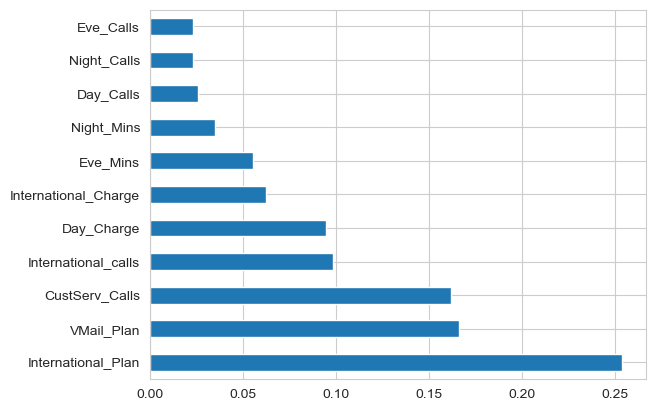

In [158]:
feat_importances = pd.Series(XGB.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Conclusion

AS we can see from above results, XGB Classifier is best performer on training with 100%  and on test accuracy of 95.5% as logg loss also less.
 
We have also second best performing model i.e random forest algorithm

The top 5 most contribution features are:

1.International_Plan
2.VMail_Plan
3.CustServ_Calls
4.International_calls 
5.Day_Charge 

## Recommendation

The most important features affecting the Churn are International Plan,Day Charge,Cust Service Calls, Voice Mail Message, Evening Charge and International Charge.

From above analysis we can clearly find out the Churn YES Customers. We can undergo retention campaigns for them with lucrative offers, provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.